# **E-commerce Customer Segmentation and Prediction - Siddharth Narayanan**

>



---------------------------------------------------------

## 1. Data Loading

In [ ]:
print("Test Kernel")

Test Kernel


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

data = pd.read_csv('/content/drive/MyDrive/BIA/Capstone project/data.csv', encoding='ISO-8859-1')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
data['InvoiceNo'].nunique()

25900

In [ ]:
data['CustomerID'].nunique()

4372

In [ ]:
data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

           InvoiceDate  UnitPrice  CustomerID         Country  
0        12/01/10 8:26       2.55     17850.0  United Kingdom  
1        12/01/10 8:26       3.39     17850.0  United Kingdom  
2        12/01/10 8:26       2.75     17850.0  United Kingdom  
3        12/01/10 8:26       3.39     17850.0  United Kingdom  
4        12/01/10 8:26       3.39     17850.0  United Kingdom  
...                ...        ...         ...             ...  
541904  12/09/11 12:50       0.85     12680.0          France  
541905  12/09/11 12:50       2.10     12680.0          France  
541906  12/09/11 12:50       4.15     12680.0          France  
541907  12/09/11 12:50       4.15     12680.0          France  
541908  12/09/11 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

** Different levels ** :

Customer level - Unique - CustomerID

Order level - Unique - InvoiceNo.

In [ ]:
data['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

Negative Quantity measures must indicate returns

## 2. Exploratory Data Analysis


### Missing customer ID

#### Checking the nature of orders with missing customer ID

In [ ]:
# Check the proportion of missing CustomerID values
missing_customer_id = data['CustomerID'].isnull().sum()
total_entries = len(data)
proportion_missing = (missing_customer_id / total_entries) * 100

print(f"Total entries: {total_entries}")
print(f"Missing CustomerID entries: {missing_customer_id}")
print(f"Proportion of missing CustomerID values: {proportion_missing:.2f}%")




Total entries: 541909
Missing CustomerID entries: 135080
Proportion of missing CustomerID values: 24.93%


In [ ]:
 # Analyze patterns in missing CustomerID values
# Create a new column to flag rows with missing CustomerID
data['MissingCustomerID'] = data['CustomerID'].isnull()

# Check if there are any patterns or correlations between missing CustomerID and other columns
# Select only numeric columns for correlation analysis
missing_correlation = data.select_dtypes(include='number').groupby(data['MissingCustomerID']).mean()

print("\nCorrelation of Missing CustomerID with other numerical columns:")
print(missing_correlation)

# Additional check: Distribution of other columns when CustomerID is missing
print("\nDistribution of other columns when CustomerID is missing:")
missing_distribution = data[data['MissingCustomerID'] == True].describe(include='all')
print(missing_distribution)


Correlation of Missing CustomerID with other numerical columns:
                    Quantity  UnitPrice   CustomerID
MissingCustomerID                                   
False              12.061303   3.460471  15287.69057
True                1.995573   8.076577          NaN

Distribution of other columns when CustomerID is missing:
       InvoiceNo StockCode     Description       Quantity       InvoiceDate  \
count     135080    135080          133626  135080.000000            135080   
unique      3710      3810            3554            NaN              3161   
top       573585       DOT  DOTCOM POSTAGE            NaN  10/31/2011 14:41   
freq        1114       694             693            NaN              1114   
mean         NaN       NaN             NaN       1.995573               NaN   
std          NaN       NaN             NaN      66.696153               NaN   
min          NaN       NaN             NaN   -9600.000000               NaN   
25%          NaN       NaN      

######  Insights from the Output: REPHRASE

Proportion of Missing CustomerID:


24.93% of the entries have missing CustomerID values. This is a significant portion, indicating that nearly a quarter of the dataset lacks customer identification.


Correlation with Other Numerical Columns:

Quantity: The mean quantity purchased is significantly lower for rows with missing CustomerID (1.99) compared to those with CustomerID (12.06). This suggests that transactions without a CustomerID tend to involve smaller quantities.

UnitPrice: The mean UnitPrice is higher for rows with missing CustomerID (8.08) compared to those with CustomerID (3.46). This could indicate that items purchased in transactions without a CustomerID are generally more expensive.


Distribution of Other Columns When CustomerID is Missing:

InvoiceNo and StockCode: The most frequent values for these columns in the missing CustomerID entries are 573585 and DOT COM, respectively. This might suggest that these transactions could be related to specific types of orders, perhaps online or special orders.

Country: The most frequent country for transactions with missing CustomerID is the United Kingdom.

Quantity: The quantity distribution shows that there are negative values, which might indicate returns or corrections.

UnitPrice: The range of UnitPrice values is quite broad, with some negative values, again potentially indicating returns or corrections.

Key Takeaways:
The missing CustomerID entries are non-negligible, and they seem to be associated with lower quantities but higher unit prices. This might suggest that these transactions are different in nature, potentially related to specific types of orders, returns, or corrections.



The high proportion of missing CustomerID values suggests that we need to carefully consider whether to drop these rows or treat them separately in the analysis.


Next Steps:
Consider treating transactions with missing CustomerID as a separate segment: Given the significant differences in behavior, these rows could represent a unique customer segment or special transactions.
Investigate further: You may want to dive deeper into the nature of these transactions, especially looking at InvoiceNo and StockCode patterns to better understand why CustomerID might be missing.

#### Segmenting the data into two subsets - missing customer ID and not missing customer ID


In [ ]:
# Create a separate segment for transactions with missing CustomerID
missing_customer_segment = data[data['CustomerID'].isnull()]
valid_customer_segment = data[data['CustomerID'].notnull()]

# Display basic information about the two segments
print(f"Transactions with missing CustomerID: {len(missing_customer_segment)}")
print(f"Transactions with valid CustomerID: {len(valid_customer_segment)}")


Transactions with missing CustomerID: 135080
Transactions with valid CustomerID: 406829


#### Analysing the InvoiceID patterns for the missing customer ID patterns

In [ ]:
# Analyze the most common InvoiceNo patterns in the missing CustomerID segment
invoice_patterns_missing = missing_customer_segment['InvoiceNo'].value_counts().head(10)

# Compare with the valid CustomerID segment
invoice_patterns_valid = valid_customer_segment['InvoiceNo'].value_counts().head(10)

print("Top 10 InvoiceNo patterns in missing CustomerID segment:")
print(invoice_patterns_missing)

print("\nTop 10 InvoiceNo patterns in valid CustomerID segment:")
print(invoice_patterns_valid)


Top 10 InvoiceNo patterns in missing CustomerID segment:
InvoiceNo
573585    1114
581219     749
581492     731
580729     721
558475     705
579777     687
581217     676
537434     675
580730     662
538071     652
Name: count, dtype: int64

Top 10 InvoiceNo patterns in valid CustomerID segment:
InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
567656    421
567183    399
575607    377
571441    364
570488    353
Name: count, dtype: int64


#### Analysing stock code patterns

In [ ]:
# Analyze the most common StockCode patterns in the missing CustomerID segment
stockcode_patterns_missing = missing_customer_segment['StockCode'].value_counts().head(10)

# Compare with the valid CustomerID segment
stockcode_patterns_valid = valid_customer_segment['StockCode'].value_counts().head(10)

print("Top 10 StockCode patterns in missing CustomerID segment:")
print(stockcode_patterns_missing)

print("\nTop 10 StockCode patterns in valid CustomerID segment:")
print(stockcode_patterns_valid)


Top 10 StockCode patterns in missing CustomerID segment:
StockCode
DOT       694
85099B    497
21931     414
22411     388
20712     372
22197     358
22386     348
22379     341
21731     328
21935     326
Name: count, dtype: int64

Top 10 StockCode patterns in valid CustomerID segment:
StockCode
85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
20725     1359
22720     1232
POST      1196
20727     1126
22197     1118
Name: count, dtype: int64


In [ ]:
missing_customer_segment['StockCode'].value_counts()

StockCode
DOT       694
85099B    497
21931     414
22411     388
20712     372
         ... 
85195       1
47574B      1
16053       1
16244B      1
84859B      1
Name: count, Length: 3810, dtype: int64

In [ ]:
valid_customer_segment['StockCode'].value_counts()

StockCode
85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
          ... 
84620        1
90038B       1
84551        1
84614A       1
20957        1
Name: count, Length: 3684, dtype: int64

####  Insights:




The significant difference in the distribution of InvoiceNo between the two segments suggests that transactions with missing CustomerID are likely special or repetitive transactions, potentially handled in bulk, where individual customer identification might not be necessary or recorded.




#### Analysing stockcode with missing customer ID
This is to see if specific products are involved in missing customer ID

In [ ]:
# Analyze the most common StockCode patterns in the missing CustomerID segment
stockcode_patterns_missing = missing_customer_segment['StockCode'].value_counts().head(10)

# Compare with the valid CustomerID segment
stockcode_patterns_valid = valid_customer_segment['StockCode'].value_counts().head(10)

print("Top 10 StockCode patterns in missing CustomerID segment:")
print(stockcode_patterns_missing)

print("\nTop 10 StockCode patterns in valid CustomerID segment:")
print(stockcode_patterns_valid)


Top 10 StockCode patterns in missing CustomerID segment:
StockCode
DOT       694
85099B    497
21931     414
22411     388
20712     372
22197     358
22386     348
22379     341
21731     328
21935     326
Name: count, dtype: int64

Top 10 StockCode patterns in valid CustomerID segment:
StockCode
85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
20725     1359
22720     1232
POST      1196
20727     1126
22197     1118
Name: count, dtype: int64


#### Insights
The presence of the StockCode DOT as the most frequent code in the missing CustomerID segment suggests it might represent a special product, service, or transaction type where customer identification is not necessary.

The overlap of StockCode 85099B between both segments indicates that while some products are commonly purchased, the circumstances under which CustomerID is recorded might vary.


Conclusion:
The analysis suggests that transactions with missing CustomerID are likely associated with specific types of orders (possibly bulk or special orders) or products that don't require individual customer identification. This could be due to business practices or systems in place during certain transactions.

#### Checking to see the number of occurences of DOT with valid customer ID - (missing ID's biggerst Stock Code

In [ ]:
# Count the occurrences of 'DOT' in the StockCode column within the valid CustomerID segment
dot_occurrences_valid = valid_customer_segment[valid_customer_segment['StockCode'] == 'DOT'].shape[0]

print(f"Occurrences of 'DOT' in the valid CustomerID segment: {dot_occurrences_valid}")


Occurrences of 'DOT' in the valid CustomerID segment: 16


Interpretation:


The 'DOT' product appears 16 times in transactions where a valid CustomerID is recorded, compared to 694 times in transactions where CustomerID is missing.

This stark difference suggests that the 'DOT' product is primarily associated with transactions that do not require a CustomerID, possibly due to the nature of these transactions (e.g., bulk orders, special services, or non-customer-specific transactions).


#### Creating a new column to indicate whether customerID is missing or not

In [ ]:
# Label the segments
data['CustomerSegment'] = data['CustomerID'].apply(lambda x: 'MissingCustomerID' if pd.isnull(x) else 'ValidCustomerID')

# Verify the labeling
print(data['CustomerSegment'].value_counts())


CustomerSegment
ValidCustomerID      406829
MissingCustomerID    135080
Name: count, dtype: int64


### Negative Quantity - Returns

In [ ]:
# Filter rows where Quantity is less than 0
negative_quantity_rows = data[data['Quantity'] < 0]

# Display the rows with negative quantities
print(negative_quantity_rows)

negative_quantity_rows.head()  # Show the first few rows


       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

           InvoiceDate  UnitPrice  CustomerID         Country  \
141      12/01/10 9:41      27.50     14527.0 

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

        InvoiceDate  UnitPrice  CustomerID         Country  MissingCustomerID  \
141   12/01/10 9:41      27.50     14527.0  United Kingdom              False   
154   12/01/10 9:49       4.65     15311.0  United Kingdom              False   
235  12/01/10 10:24       1.65     17548.0  United Kingdom              False   
236  12/01/10 10:24       0.29     17548.0  United Kingdom              False   
237  12/01/10 10:24       0.29     17548.0  United Kingdom              False   

     CustomerSegment  
141  ValidCustomerID  
154  ValidCustomerID  
235  ValidCustomerID  
236  ValidCustomerID  
237  ValidCustomerID

In [ ]:
# Filter rows where Quantity is less than 0
negative_quantity_rows = data[data['Quantity'] < 0]

# Display the rows with negative quantities
print(negative_quantity_rows)

# Alternatively, if you have many rows and want to explore them more easily in Colab:
negative_quantity_rows.head()  # Show the first few rows


       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

           InvoiceDate  UnitPrice  CustomerID         Country  \
141      12/01/10 9:41      27.50     14527.0 

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

        InvoiceDate  UnitPrice  CustomerID         Country  MissingCustomerID  \
141   12/01/10 9:41      27.50     14527.0  United Kingdom              False   
154   12/01/10 9:49       4.65     15311.0  United Kingdom              False   
235  12/01/10 10:24       1.65     17548.0  United Kingdom              False   
236  12/01/10 10:24       0.29     17548.0  United Kingdom              False   
237  12/01/10 10:24       0.29     17548.0  United Kingdom              False   

     CustomerSegment  
141  ValidCustomerID  
154  ValidCustomerID  
235  ValidCustomerID  
236  ValidCustomerID  
237  ValidCustomerID

### Understanding Type of Products

In [ ]:
from collections import Counter
import re

# Combine all descriptions into a single text string
all_descriptions = ' '.join(data['Description'].dropna().unique())

# Remove non-alphanumeric characters and split into words
words = re.findall(r'\b\w+\b', all_descriptions.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Display the 20 most common words
common_words = word_counts.most_common(20)
print("Top 20 Most Common Words in Descriptions:")
for word, count in common_words:
    print(f"{word}: {count}")


Top 20 Most Common Words in Descriptions:
set: 390
pink: 327
of: 241
heart: 239
blue: 232
vintage: 220
red: 205
glass: 173
bag: 171
christmas: 157
white: 149
box: 141
design: 129
flower: 119
holder: 118
t: 117
light: 115
small: 115
metal: 112
3: 111


In [ ]:
data['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

#### Grouping by Keyword

In [ ]:
# Example: Grouping stock codes based on common keywords in their descriptions
def categorize_description(description):
    description = str(description).lower()
    if 'bag' in description:
        return 'Bags'
    elif 'cup' in description:
        return 'Cups'
    elif 'plate' in description:
        return 'Plates'
    elif 'clock' in description:
        return 'Clocks'
    elif 'light' in description:
        return 'Lights'
    elif 'holder' in description:
        return 'house accessory'
    elif 'handle' in description:
        return 'house accessory'
    elif 'set' in description:
        return 'set'
    elif 'glass' in description:
        return 'glass'
    else:
        return 'Miscellaneous'

# Apply the categorization to the dataset
data['ProductCategory'] = data['Description'].apply(categorize_description)

# Display the distribution of product categories
category_counts = data['ProductCategory'].value_counts().reset_index()
category_counts.columns = ['ProductCategory', 'Count']

print("Distribution of Product Categories:")
display(category_counts)


Distribution of Product Categories:


ProductCategory   Count
0    Miscellaneous  370989
1              set   58127
2             Bags   53037
3           Lights   24159
4             Cups   10704
5           Clocks    7381
6            glass    6892
7  house accessory    6090
8           Plates    4530

### Next steps : EDA --> Feature Selection

1. Exploratory Data Analysis (EDA)

2.
a. Understanding Customer Behavior:

Recency: Time since the customer’s last purchase.

Frequency: Number of purchases made by the customer.

Monetary Value: Total spending by the customer.


b. Data Visualization:

Distribution Plots: Visualize the distribution of Quantity, UnitPrice, and other numerical features.

Correlation Matrix: Visualize correlations between numerical features to identify potential relationships.



Time Series Analysis: Analyze the trend of purchases over time.

2. Feature Selection
   
a. Feature Engineering:

RFM Analysis: Create Recency, Frequency, and Monetary Value features.

Categorical Encoding: Encode categorical variables such as Country and StockCode if necessary.

Date-Time Features: Extract features like day of the week, month, and hour from InvoiceDate.


b. Feature Importance:

Use models like Random Forest or XGBoost to assess feature importance.

Analyze the impact of each feature on customer segmentation and prediction.

## 3. RFM analysis - Recency, Frequency and Monetary



Recency: The number of days since the customer's last purchase.

Frequency: The total number of purchases made by the customer.

Monetary Value: The total amount of money spent by the customer.


#### Creating a simple RFM table

In [ ]:
# Convert 'InvoiceDate' to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Create the 'MonetaryValue' column
data['MonetaryValue'] = data['Quantity'] * data['UnitPrice']

# Reference date for calculating recency
reference_date = data['InvoiceDate'].max()

# Calculate Recency, Frequency, and Monetary value for each CustomerID
rfm_table = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'MonetaryValue': 'sum'  # Monetary Value
})

# Rename the columns in the rfm TABLE
rfm_table.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'MonetaryValue': 'Monetary'}, inplace=True)

# Display the first few rows of the RFM table
print(rfm_table.head())


NameError: name 'pd' is not defined

In [ ]:
rfm_table

NameError: name 'rfm_table' is not defined

#### Visualising RFM distribution

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
plt.figure(figsize=(18, 6))

# Plot Recency Distribution
plt.subplot(1, 3, 1)
sns.histplot(rfm_table['Recency'], kde=True, color='skyblue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')

# Plot Frequency Distribution
plt.subplot(1, 3, 2)
sns.histplot(rfm_table['Frequency'], kde=True, color='salmon')
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')

# Plot Monetary Distribution
plt.subplot(1, 3, 3)
sns.histplot(rfm_table['Monetary'], kde=True, color='lightgreen')
plt.title('Monetary Value Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

# Boxplots to check for outliers
plt.figure(figsize=(18, 6))

# Boxplot for Recency
plt.subplot(1, 3, 1)
sns.boxplot(y=rfm_table['Recency'], color='skyblue')
plt.title('Recency Boxplot')

# Boxplot for Frequency
plt.subplot(1, 3, 2)
sns.boxplot(y=rfm_table['Frequency'], color='salmon')
plt.title('Frequency Boxplot')

# Boxplot for Monetary Value
plt.subplot(1, 3, 3)
sns.boxplot(y=rfm_table['Monetary'], color='lightgreen')
plt.title('Monetary Value Boxplot')

# Show the boxplots
plt.tight_layout()
plt.show()


## 4. Feature Engineering

### Step 1: Data Preparation and Importing Necessary Libraries


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

# Set display options for better readability
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')



In [ ]:
# Preview the data
print("First five rows of the sample_data:")
display(data.head())

print("\nSummary statistics of the sample_data:")
display(data.describe())

print("\nData types and missing values:")
display(data.info())


First five rows of the sample_data:


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

   MissingCustomerID  CustomerSegment ProductCategory  MonetaryValue  
0              False  ValidCustomerID          Lights          15.30  
1              False  ValidCustomerID   Miscellaneous          20.34  
2              False  ValidCustomerID            Cups          22.00  
3              False  ValidCustomerID   Miscellaneous          20.34  
4              False  ValidCustomerID   Miscellaneous          20.34


Summary statistics of the sample_data:


Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  MonetaryValue  
count  406829.000000  541909.000000  
mean    15287.690570      17.987795  
min     12346.000000 -168469.600000  
25%     13953.000000       3.400000  
50%     15152.000000       9.750000  
75%     16791.000000      17.400000  
max     18287.000000  168469.600000  
std      1713.600303     378.810824


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          541909 non-null  object        
 1   StockCode          541909 non-null  object        
 2   Description        540455 non-null  object        
 3   Quantity           541909 non-null  int64         
 4   InvoiceDate        541909 non-null  datetime64[ns]
 5   UnitPrice          541909 non-null  float64       
 6   CustomerID         406829 non-null  float64       
 7   Country            541909 non-null  object        
 8   MissingCustomerID  541909 non-null  bool          
 9   CustomerSegment    541909 non-null  object        
 10  ProductCategory    541909 non-null  object        
 11  MonetaryValue      541909 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(6)
memor

None

### Step 2: Customer wise Feature Engineering

In [ ]:
# Ensure the 'InvoiceDate' column is in datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Define a reference date for recency calculation
reference_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Reference Date for Recency Calculation: {reference_date.date()}")

# Grouping by CustomerID and calculating RFM metrics
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                     # Frequency
    'MonetaryValue': 'sum'                                      # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Preview the RFM table
print("RFM Table Preview:")
display(rfm.head())

# Descriptive statistics for RFM
print("RFM Table Description:")
display(rfm.describe())


Reference Date for Recency Calculation: 2011-12-10
RFM Table Preview:


CustomerID  Recency  Frequency  Monetary
0     12346.0      326          2      0.00
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40

RFM Table Description:


CustomerID      Recency    Frequency       Monetary
count   4372.000000  4372.000000  4372.000000    4372.000000
mean   15299.677722    92.047118     5.075480    1898.459701
std     1722.390705   100.765435     9.338754    8219.345141
min    12346.000000     1.000000     1.000000   -4287.630000
25%    13812.750000    17.000000     1.000000     293.362500
50%    15300.500000    50.000000     3.000000     648.075000
75%    16778.250000   143.000000     5.000000    1611.725000
max    18287.000000   374.000000   248.000000  279489.020000

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4372 non-null   float64
 1   Recency     4372 non-null   int64  
 2   Frequency   4372 non-null   int64  
 3   Monetary    4372 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 136.8 KB


### Step 3: Additional Feature Engineering

Enhancing the RFM model by adding more features.

#### 1. Average Order Value

In [ ]:
# Calculate Average Order Value
avg_order_value = data.groupby('CustomerID').agg({
    'MonetaryValue': lambda x: x.sum() / x.count()
}).reset_index().rename(columns={'MonetaryValue': 'AvgOrderValue'})

# Merge with RFM table
rfm = pd.merge(rfm, avg_order_value, on='CustomerID')

print("RFM with Average Order Value:")
display(rfm.head())


RFM with Average Order Value:


CustomerID  Recency  Frequency  Monetary  AvgOrderValue
0     12346.0      326          2      0.00       0.000000
1     12347.0        2          7   4310.00      23.681319
2     12348.0       75          4   1797.24      57.975484
3     12349.0       19          1   1757.55      24.076027
4     12350.0      310          1    334.40      19.670588

In [ ]:
data.groupby('CustomerID').agg({
    'MonetaryValue': lambda x: x.sum() / x.count()
}).reset_index().rename(columns={'MonetaryValue': 'AvgOrderValue'})


CustomerID  AvgOrderValue
0        12346.0       0.000000
1        12347.0      23.681319
2        12348.0      57.975484
3        12349.0      24.076027
4        12350.0      19.670588
...          ...            ...
4367     18280.0      18.060000
4368     18281.0      11.545714
4369     18282.0      13.584615
4370     18283.0       2.771005
4371     18287.0      26.246857

[4372 rows x 2 columns]

#### 2. Average Purchase Interval

Average time interval between a customers next purchase. (Shows regularity)
 Calculate the average number of days between consecutive purchases for each customer.

In [ ]:
# Calculate Purchase Dates per Customer
purchase_dates = data.groupby('CustomerID')['InvoiceDate'].apply(list)

# Calculate Average Purchase Interval
def avg_purchase_interval(dates):
    if len(dates) > 1:
        intervals = [(dates[i] - dates[i-1]).days for i in range(1, len(dates))]
        return np.mean(intervals)
    else:
        return np.nan  # Not enough data to calculate interval

avg_interval = purchase_dates.apply(lambda x: avg_purchase_interval(sorted(x))).reset_index().rename(columns={'InvoiceDate': 'AvgPurchaseInterval'})

# Merge with RFM table
rfm = pd.merge(rfm, avg_interval, on='CustomerID')

print("RFM with Average Purchase Interval:")
display(rfm.head())


RFM with Average Purchase Interval:


CustomerID  Recency  Frequency  Monetary  AvgOrderValue  \
0     12346.0      326          2      0.00       0.000000   
1     12347.0        2          7   4310.00      23.681319   
2     12348.0       75          4   1797.24      57.975484   
3     12349.0       19          1   1757.55      24.076027   
4     12350.0      310          1    334.40      19.670588   

   AvgPurchaseInterval  
0                  0.0  
1                  2.0  
2                  9.4  
3                  0.0  
4                  0.0

#### 3. Returns ratio

calculates the ratio of number of returns is to number of orders

In [ ]:
# Calculate total returns (negative quantities)
returns = data[data['Quantity'] < 0].groupby('CustomerID').agg({
    'Quantity': 'sum'
}).reset_index().rename(columns={'Quantity': 'TotalReturns'})

# Calculate total purchases (positive quantities)
purchases = data[data['Quantity'] > 0].groupby('CustomerID').agg({
    'Quantity': 'sum'
}).reset_index().rename(columns={'Quantity': 'TotalPurchases'})

# Merge returns and purchases
returns_ratio = pd.merge(purchases, returns, on='CustomerID', how='left').fillna(0)
returns_ratio['ReturnsRatio'] = abs(returns_ratio['TotalReturns']) / returns_ratio['TotalPurchases']

# Merge with RFM table
rfm = pd.merge(rfm, returns_ratio[['CustomerID', 'ReturnsRatio']], on='CustomerID', how='left')

print("RFM with Returns Ratio:")
display(rfm.head())


RFM with Returns Ratio:


CustomerID  Recency  Frequency  Monetary  AvgOrderValue  \
0     12346.0      326          2      0.00       0.000000   
1     12347.0        2          7   4310.00      23.681319   
2     12348.0       75          4   1797.24      57.975484   
3     12349.0       19          1   1757.55      24.076027   
4     12350.0      310          1    334.40      19.670588   

   AvgPurchaseInterval  ReturnsRatio  
0                  0.0           1.0  
1                  2.0           0.0  
2                  9.4           0.0  
3                  0.0           0.0  
4                  0.0           0.0

#### 4. Total monetary value of Returns. : Returns Value

In [ ]:
# Calculate the total monetary value of returns (negative quantities)
returns_value = data[data['Quantity'] < 0].groupby('CustomerID').agg({
    'MonetaryValue': 'sum'
}).reset_index().rename(columns={'MonetaryValue': 'TotalReturnValue'})

# Preview the returns_value DataFrame
print("Total Return Value per Customer:")
display(returns_value.head())


Total Return Value per Customer:


CustomerID  TotalReturnValue
0     12346.0         -77183.60
1     12352.0           -960.63
2     12359.0           -127.05
3     12362.0            -71.65
4     12365.0           -320.69

#### 5. Total Monetary Value of purchases. : Purchase Value

In [ ]:
# Calculate the total monetary value of purchases (positive quantities)
purchases_value = data[data['Quantity'] > 0].groupby('CustomerID').agg({
    'MonetaryValue': 'sum'
}).reset_index().rename(columns={'MonetaryValue': 'TotalPurchaseValue'})

# Preview the purchases_value DataFrame
print("Total Purchase Value per Customer:")
display(purchases_value.head())


Total Purchase Value per Customer:


CustomerID  TotalPurchaseValue
0     12346.0            77183.60
1     12347.0             4310.00
2     12348.0             1797.24
3     12349.0             1757.55
4     12350.0              334.40

#### 6. Monetary Returns Ratio

In [ ]:
# Merge the returns_value and purchases_value DataFrames on CustomerID
monetary_values = pd.merge(purchases_value, returns_value, on='CustomerID', how='left').fillna(0)

# Calculate the Monetary Returns Ratio
monetary_values['MonetaryReturnsRatio'] = abs(monetary_values['TotalReturnValue']) / monetary_values['TotalPurchaseValue']

# Preview the monetary_values DataFrame
print("Monetary Values and Returns Ratio per Customer:")
display(monetary_values.head())


Monetary Values and Returns Ratio per Customer:


CustomerID  TotalPurchaseValue  TotalReturnValue  MonetaryReturnsRatio
0     12346.0            77183.60          -77183.6                   1.0
1     12347.0             4310.00               0.0                   0.0
2     12348.0             1797.24               0.0                   0.0
3     12349.0             1757.55               0.0                   0.0
4     12350.0              334.40               0.0                   0.0

##### Merging with rfm table

In [ ]:
# Merge the monetary_values DataFrame with the existing RFM table
rfm = pd.merge(rfm, monetary_values[['CustomerID', 'TotalReturnValue', 'TotalPurchaseValue', 'MonetaryReturnsRatio']], on='CustomerID', how='left')

# Preview the updated RFM table
print("Updated RFM with Monetary Values and Returns Ratio:")
display(rfm.head())


Updated RFM with Monetary Values and Returns Ratio:


CustomerID  Recency  Frequency  Monetary  AvgOrderValue  \
0     12346.0      326          2      0.00       0.000000   
1     12347.0        2          7   4310.00      23.681319   
2     12348.0       75          4   1797.24      57.975484   
3     12349.0       19          1   1757.55      24.076027   
4     12350.0      310          1    334.40      19.670588   

   AvgPurchaseInterval  ReturnsRatio  TotalReturnValue  TotalPurchaseValue  \
0                  0.0           1.0          -77183.6            77183.60   
1                  2.0           0.0               0.0             4310.00   
2                  9.4           0.0               0.0             1797.24   
3                  0.0           0.0               0.0             1757.55   
4                  0.0           0.0               0.0              334.40   

   MonetaryReturnsRatio  
0                   1.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0

#### 7 Products Purchased

In [ ]:
# 1. Products Purchased
# 'Description' defines the product

products_purchased = data.groupby('CustomerID')['Description'].nunique().reset_index()
products_purchased.columns = ['CustomerID', 'ProductPurchased']



In [ ]:
products_purchased

CustomerID  ProductPurchased
0        12346.0                 1
1        12347.0               103
2        12348.0                22
3        12349.0                73
4        12350.0                17
...          ...               ...
4367     18280.0                10
4368     18281.0                 7
4369     18282.0                12
4370     18283.0               272
4371     18287.0                59

[4372 rows x 2 columns]

In [ ]:
rfm

CustomerID  Recency  Frequency  Monetary  AvgOrderValue  \
0        12346.0      326          2      0.00       0.000000   
1        12347.0        2          7   4310.00      23.681319   
2        12348.0       75          4   1797.24      57.975484   
3        12349.0       19          1   1757.55      24.076027   
4        12350.0      310          1    334.40      19.670588   
...          ...      ...        ...       ...            ...   
4367     18280.0      278          1    180.60      18.060000   
4368     18281.0      181          1     80.82      11.545714   
4369     18282.0        8          3    176.60      13.584615   
4370     18283.0        4         16   2094.88       2.771005   
4371     18287.0       43          3   1837.28      26.246857   

      AvgPurchaseInterval  ReturnsRatio  TotalReturnValue  TotalPurchaseValue  \
0                0.000000      1.000000         -77183.60            77183.60   
1                2.000000      0.000000              0.00             4310.00   
2                9.400000      0.000000              0.00             1797.24   
3                0.000000      0.000000              0.00             1757.55   
4                0.000000      0.000000              0.00              334.40   
...                   ...           ...               ...                 ...   
4367             0.000000      0.000000              0.00              180.60   
4368             0.000000      0.000000              0.00               80.82   
4369             9.833333      0.048544             -1.45              178.05   
4370             0.433113      0.000000              0.00             2094.88   
4371             2.275362      0.000000              0.00             1837.28   

      MonetaryReturnsRatio  
0                 1.000000  
1                 0.000000  
2                 0.000000  
3                 0.000000  
4                 0.000000  
...                    ...  
4367              0.000000  
4368              0.000000  
4369              0.008144  
4370              0.000000  
4371              0.000000  

[4372 rows x 10 columns]

#### 8. Customer Loyalty Duration

Days between first purchase and most recent purchase

In [ ]:
# 2. Customer Loyalty Duration

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate the first and last purchase dates
loyalty_duration = data.groupby('CustomerID').agg(
    FirstPurchase=('InvoiceDate', 'min'),
    LastPurchase=('InvoiceDate', 'max')
).reset_index()

# Calculate the loyalty duration in days
loyalty_duration['CustomerLoyaltyDuration'] = (loyalty_duration['LastPurchase'] - loyalty_duration['FirstPurchase']).dt.days

# Drop the FirstPurchase and LastPurchase columns, keeping only the duration
loyalty_duration = loyalty_duration[['CustomerID', 'CustomerLoyaltyDuration']]

loyalty_duration

CustomerID  CustomerLoyaltyDuration
0        12346.0                        0
1        12347.0                      365
2        12348.0                      282
3        12349.0                        0
4        12350.0                        0
...          ...                      ...
4367     18280.0                        0
4368     18281.0                        0
4369     18282.0                      118
4370     18283.0                      333
4371     18287.0                      158

[4372 rows x 2 columns]

#### 9. Order Count

In [ ]:
##. Order Count
# Count the number of unique invoices per customer
order_count = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
order_count.columns = ['CustomerID', 'OrderCount']

# Merge all new features into the RFM table
rfm = rfm.merge(products_purchased, on='CustomerID', how='left')
rfm = rfm.merge(loyalty_duration, on='CustomerID', how='left')
rfm = rfm.merge(order_count, on='CustomerID', how='left')

# Display the updated RFM table
print("Updated RFM Table:")
display(rfm.head())


Updated RFM Table:


CustomerID  Recency  Frequency  Monetary  AvgOrderValue  \
0     12346.0      326          2      0.00       0.000000   
1     12347.0        2          7   4310.00      23.681319   
2     12348.0       75          4   1797.24      57.975484   
3     12349.0       19          1   1757.55      24.076027   
4     12350.0      310          1    334.40      19.670588   

   AvgPurchaseInterval  ReturnsRatio  TotalReturnValue  TotalPurchaseValue  \
0                  0.0           1.0          -77183.6            77183.60   
1                  2.0           0.0               0.0             4310.00   
2                  9.4           0.0               0.0             1797.24   
3                  0.0           0.0               0.0             1757.55   
4                  0.0           0.0               0.0              334.40   

   MonetaryReturnsRatio  ProductPurchased  CustomerLoyaltyDuration  OrderCount  
0                   1.0                 1                        0           2  
1                   0.0               103                      365           7  
2                   0.0                22                      282           4  
3                   0.0                73                        0           1  
4                   0.0                17                        0           1

#### 10. No. of product Categories purchased per customer

In [ ]:
# Number of unique ProductCategory per customer
num_product_categories = data.groupby('CustomerID')['ProductCategory'].nunique().reset_index()
num_product_categories.columns = ['CustomerID', 'NumProductCategories']

# Merge with the RFM table
rfm = rfm.merge(num_product_categories, on='CustomerID', how='left')


#### 11. Most Common Product Category Per customer

In [ ]:
# Most common ProductCategory per customer
most_common_category = data.groupby('CustomerID')['ProductCategory'].agg(lambda x: x.value_counts().idxmax()).reset_index()
most_common_category.columns = ['CustomerID', 'MostCommonCategory']

# Merge with the RFM table
rfm = rfm.merge(most_common_category, on='CustomerID', how='left')


#### 12. Whether They Have Purchased Any Items from the Top 10 Stock Codes (1 or 0)

In [ ]:
# Identify the top 10 most frequent StockCodes
top_10_stockcodes = data['StockCode'].value_counts().nlargest(10).index

# Create a binary feature for whether a customer has purchased any of the top 10 StockCodes
top_stockcode_purchase = data.groupby('CustomerID')['StockCode'].apply(lambda x: int(any(stock in x.values for stock in top_10_stockcodes))).reset_index()
top_stockcode_purchase.columns = ['CustomerID', 'PurchasedTop10StockCodes']

# Merge with the RFM table
rfm = rfm.merge(top_stockcode_purchase, on='CustomerID', how='left')


#### 13. Whether They Have Purchased Any Items from the Top 10 Descriptions (1 or 0)

In [ ]:
# Identify the top 10 most frequent Descriptions
top_10_descriptions = data['Description'].value_counts().nlargest(10).index

# Create a binary feature for whether a customer has purchased any of the top 10 Descriptions
top_description_purchase = data.groupby('CustomerID')['Description'].apply(lambda x: int(any(desc in x.values for desc in top_10_descriptions))).reset_index()
top_description_purchase.columns = ['CustomerID', 'PurchasedTop10Descriptions']

# Merge with the RFM table
rfm = rfm.merge(top_description_purchase, on='CustomerID', how='left')


## 5. Data Preprocessing

#### 1. Handling Missing Values

In [ ]:
# Check for missing values
print("Missing values in RFM table:")
display(rfm.isnull().sum())



Missing values in RFM table:


CustomerID                     0
Recency                        0
Frequency                      0
Monetary                       0
AvgOrderValue                  0
AvgPurchaseInterval           79
ReturnsRatio                  33
TotalReturnValue              33
TotalPurchaseValue            33
MonetaryReturnsRatio          34
ProductPurchased               0
CustomerLoyaltyDuration        0
OrderCount                     0
NumProductCategories           0
MostCommonCategory             0
PurchasedTop10StockCodes       0
PurchasedTop10Descriptions     0
dtype: int64

In [ ]:
# Handling missing values
rfm_clean = rfm.dropna()

print("After handling missing values:")
display(rfm_clean.isnull().sum())


After handling missing values:


CustomerID                    0
Recency                       0
Frequency                     0
Monetary                      0
AvgOrderValue                 0
AvgPurchaseInterval           0
ReturnsRatio                  0
TotalReturnValue              0
TotalPurchaseValue            0
MonetaryReturnsRatio          0
ProductPurchased              0
CustomerLoyaltyDuration       0
OrderCount                    0
NumProductCategories          0
MostCommonCategory            0
PurchasedTop10StockCodes      0
PurchasedTop10Descriptions    0
dtype: int64

#### 2. Handling Outliers

##### Defining a function to identify outliers

In [ ]:
def remove_outliers(df, columns, multiplier=1.5):
    """
    Removes outliers from a DataFrame based on the IQR method for specified columns.

    Parameters:
    df (DataFrame): The DataFrame from which to remove outliers.
    columns (list): A list of column names for which to remove outliers.
    multiplier (float): The IQR multiplier for outlier detection. Default is 1.5.

    Returns:
    DataFrame: A DataFrame with outliers removed.
    """
    df_no_outliers = df.copy()

    for col in columns:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

    return df_no_outliers



##### Removing the Outliers using the function

In [ ]:
# Identify numerical columns
numerical_columns = rfm_clean.select_dtypes(include=['float64', 'int64']).columns

# Columns to check for outliers should be numerical only
columns_to_check = numerical_columns.intersection([
    'Recency', 'Frequency', 'Monetary', 'AvgOrderValue', 'AvgPurchaseInterval',
    'ReturnsRatio', 'TotalReturnValue', 'TotalPurchaseValue', 'MonetaryReturnsRatio',
    'CustomerLoyaltyDuration', 'OrderCount', 'NumProductCategories'
])

# Now apply the outlier removal
rfm_no_outliers = remove_outliers(rfm_clean, columns_to_check, multiplier=2.0)

print(f"Data size before outlier removal: {rfm_clean.shape}")
print(f"Data size after outlier removal: {rfm_no_outliers.shape}")



Data size before outlier removal: (4278, 17)
Data size after outlier removal: (2125, 17)


## 6. Feature Selection with Random Forest

### Using Random forest for Feature selection

#### Preprocessing

In [ ]:
# Drop CustomerID as it is not a feature
features = rfm.drop(columns=['CustomerID'])

# Handle categorical variables by converting them to numerical format (e.g., MostCommonCategory)
features = pd.get_dummies(features, drop_first=True)

# Display the first few rows to confirm the preprocessing
print("Preprocessed Features:")
display(features.head())


Preprocessed Features:


Recency  Frequency  Monetary  AvgOrderValue  AvgPurchaseInterval  \
0      326          2      0.00       0.000000                  0.0   
1        2          7   4310.00      23.681319                  2.0   
2       75          4   1797.24      57.975484                  9.4   
3       19          1   1757.55      24.076027                  0.0   
4      310          1    334.40      19.670588                  0.0   

   ReturnsRatio  TotalReturnValue  TotalPurchaseValue  MonetaryReturnsRatio  \
0           1.0          -77183.6            77183.60                   1.0   
1           0.0               0.0             4310.00                   0.0   
2           0.0               0.0             1797.24                   0.0   
3           0.0               0.0             1757.55                   0.0   
4           0.0               0.0              334.40                   0.0   

   ProductPurchased  CustomerLoyaltyDuration  OrderCount  \
0                 1                        0           2   
1               103                      365           7   
2                22                      282           4   
3                73                        0           1   
4                17                        0           1   

   NumProductCategories  PurchasedTop10StockCodes  PurchasedTop10Descriptions  \
0                     1                         0                           0   
1                     7                         1                           1   
2                     2                         0                           0   
3                     7                         1                           1   
4                     2                         0                           0   

   MostCommonCategory_Clocks  MostCommonCategory_Cups  \
0                      False                    False   
1                      False                    False   
2                      False                    False   
3                      False                    False   
4                      False                    False   

   MostCommonCategory_Lights  MostCommonCategory_Miscellaneous  \
0                      False                              True   
1                      False                              True   
2                      False                              True   
3                      False                              True   
4                      False                              True   

   MostCommonCategory_Plates  MostCommonCategory_glass  \
0                      False                     False   
1                      False                     False   
2                      False                     False   
3                      False                     False   
4                      False                     False   

   MostCommonCategory_house accessory  MostCommonCategory_set  
0                               False                   False  
1                               False                   False  
2                               False                   False  
3                               False                   False  
4                               False                   False

In [ ]:
# Check for NaN values in the features dataframe
print("Checking for NaN values:")
display(features.isna().sum())


features = features.dropna()

# Check again to ensure there are no NaN values
print("Checking for NaN values after imputation or dropping:")
display(features.isna().sum())


Checking for NaN values:


Recency                                0
Frequency                              0
Monetary                               0
AvgOrderValue                          0
AvgPurchaseInterval                   79
ReturnsRatio                          33
TotalReturnValue                      33
TotalPurchaseValue                    33
MonetaryReturnsRatio                  34
ProductPurchased                       0
CustomerLoyaltyDuration                0
OrderCount                             0
NumProductCategories                   0
PurchasedTop10StockCodes               0
PurchasedTop10Descriptions             0
MostCommonCategory_Clocks              0
MostCommonCategory_Cups                0
MostCommonCategory_Lights              0
MostCommonCategory_Miscellaneous       0
MostCommonCategory_Plates              0
MostCommonCategory_glass               0
MostCommonCategory_house accessory     0
MostCommonCategory_set                 0
dtype: int64

Checking for NaN values after imputation or dropping:


Recency                               0
Frequency                             0
Monetary                              0
AvgOrderValue                         0
AvgPurchaseInterval                   0
ReturnsRatio                          0
TotalReturnValue                      0
TotalPurchaseValue                    0
MonetaryReturnsRatio                  0
ProductPurchased                      0
CustomerLoyaltyDuration               0
OrderCount                            0
NumProductCategories                  0
PurchasedTop10StockCodes              0
PurchasedTop10Descriptions            0
MostCommonCategory_Clocks             0
MostCommonCategory_Cups               0
MostCommonCategory_Lights             0
MostCommonCategory_Miscellaneous      0
MostCommonCategory_Plates             0
MostCommonCategory_glass              0
MostCommonCategory_house accessory    0
MostCommonCategory_set                0
dtype: int64

#### Importance score

This score represents how much each feature contributes to the model’s ability to distinguish between different clusters. The score is a relative measure, meaning the higher the score, the more important the feature is.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Drop CustomerID and any other identifier columns as they are not features
features = rfm.drop(columns=['CustomerID'])

# Handle categorical variables by converting them to numerical format (e.g., MostCommonCategory)
features = pd.get_dummies(features, drop_first=True)

# Drop rows with missing values
features_cleaned = features.dropna()

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


dummy_target = np.random.randint(0, 4, size=features_cleaned.shape[0])

# Fit the Random Forest model
rf_model.fit(features_cleaned, dummy_target)

# Get feature importances from the model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking based on Random Forest importance:")
for f in range(features_cleaned.shape[1]):
    print(f"{f + 1}. Feature {features_cleaned.columns[indices[f]]} ({importances[indices[f]]:.4f})")


Feature ranking based on Random Forest importance:
1. Feature AvgOrderValue (0.1206)
2. Feature Recency (0.1175)
3. Feature TotalPurchaseValue (0.1148)
4. Feature Monetary (0.1145)
5. Feature ProductPurchased (0.1043)
6. Feature AvgPurchaseInterval (0.0738)
7. Feature CustomerLoyaltyDuration (0.0717)
8. Feature NumProductCategories (0.0598)
9. Feature ReturnsRatio (0.0370)
10. Feature Frequency (0.0368)
11. Feature MonetaryReturnsRatio (0.0363)
12. Feature OrderCount (0.0354)
13. Feature TotalReturnValue (0.0351)
14. Feature PurchasedTop10Descriptions (0.0143)
15. Feature PurchasedTop10StockCodes (0.0138)
16. Feature MostCommonCategory_Miscellaneous (0.0078)
17. Feature MostCommonCategory_Lights (0.0023)
18. Feature MostCommonCategory_set (0.0020)
19. Feature MostCommonCategory_Cups (0.0007)
20. Feature MostCommonCategory_Clocks (0.0006)
21. Feature MostCommonCategory_glass (0.0005)
22. Feature MostCommonCategory_Plates (0.0002)
23. Feature MostCommonCategory_house accessory (0.0001)


The output shows the ranking of features based on their importance as determined by the Random Forest algorithm. The importance of each feature indicates how much that feature contributes to the decision-making process of the Random Forest model. Here's a brief overview of the key features and what they represent:

1. AvgOrderValue (0.1206): This is the average value of orders per customer. A higher value indicates customers who spend more on average per transaction, which is crucial for identifying high-value customers.

2. Recency (0.1175): This measures the number of days since the customer's last purchase. Customers with lower recency values are more engaged and likely to respond positively to marketing efforts.

3. TotalPurchaseValue (0.1148): This is the total amount spent by the customer. High total purchase value indicates customers who have contributed significantly to revenue, making it an essential feature for segmentation.

4. Monetary (0.1145): This is another measure of the total amount spent by the customer but might be calculated slightly differently from TotalPurchaseValue.

5. ProductPurchased (0.1043): The total number of products purchased by the customer. This is important for understanding customer purchasing behavior and frequency.

6. AvgPurchaseInterval (0.0738): This is the average time interval between purchases. It helps to understand the purchase pattern of customers.

7. CustomerLoyaltyDuration (0.0717): This measures the duration of customer loyalty, which is the time between the first and last purchase. Long-term customers often have different behaviors compared to newer customers.

8. NumProductCategories (0.0598): The number of different product categories purchased by the customer. This indicates the diversity of a customer’s purchasing preferences.

9. ReturnsRatio (0.0370): The ratio of returned products to purchased products. This can help identify customers who frequently return items, which might indicate dissatisfaction or other issues.

10. Frequency (0.0368): This measures how often a customer makes a purchase. High frequency indicates repeat customers who are loyal to the brand.

### Correlation Matrix of rfm table

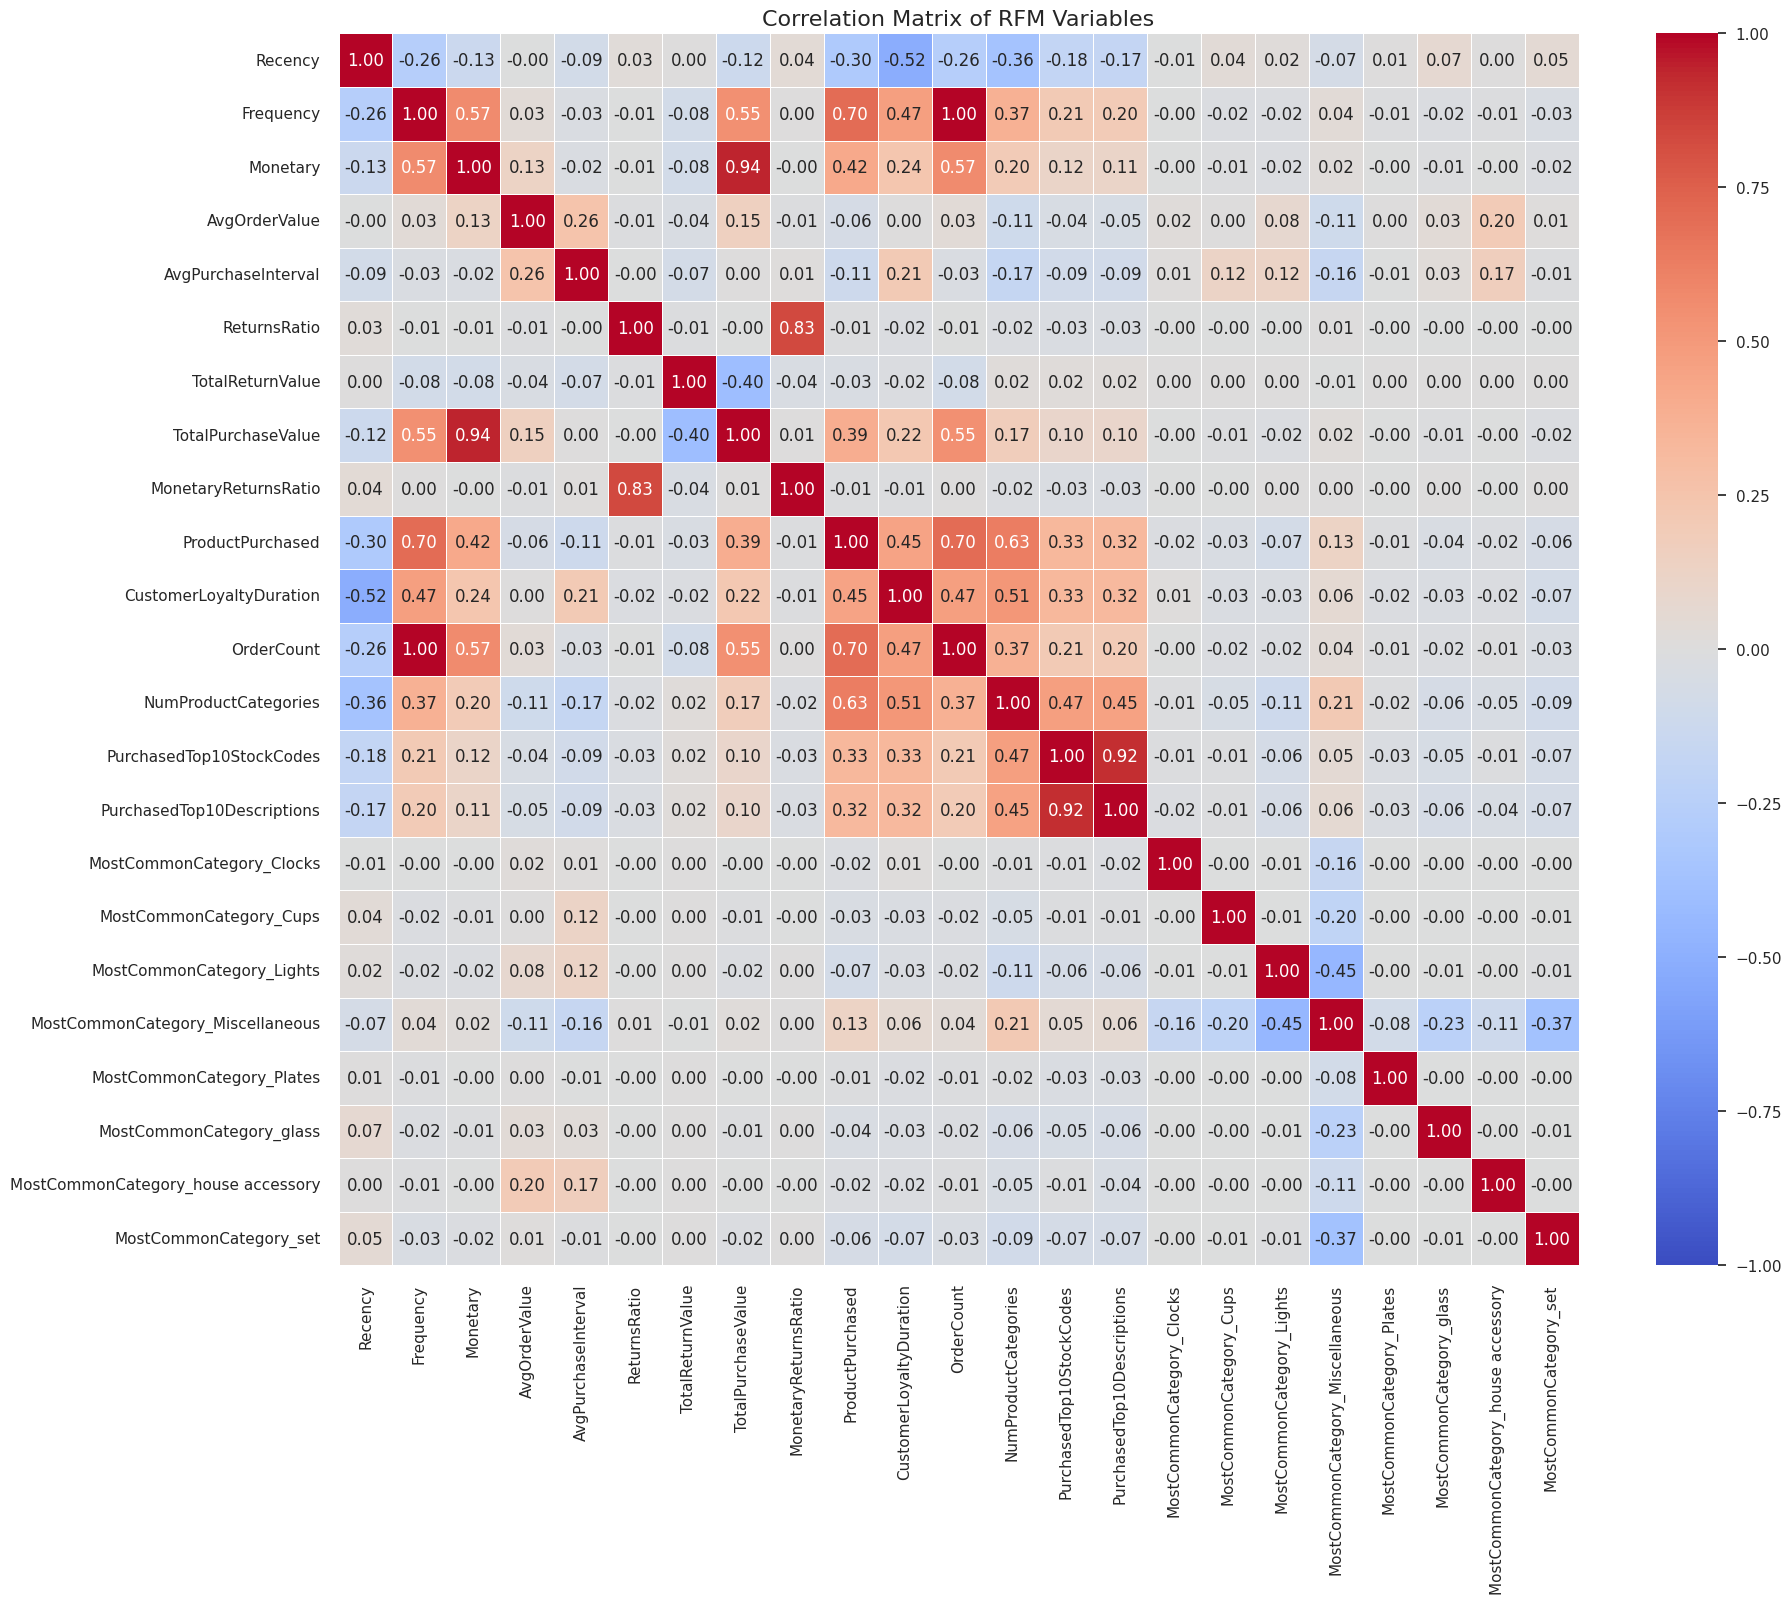

In [ ]:
# Compute the correlation matrix
corr_matrix = features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)

# Set the title for the heatmap
plt.title('Correlation Matrix of RFM Variables', fontsize=16)

# Show the plot
plt.show()


### Selected features

In [ ]:
selected_features = ['AvgOrderValue', 'Recency', 'TotalPurchaseValue', 'Monetary', 'ProductPurchased' ]

1. Feature AvgOrderValue (0.1206)
2. Feature Recency (0.1175)
3. Feature TotalPurchaseValue (0.1148)
4. Feature Monetary (0.1145)
5. Feature ProductPurchased (0.1043)

1. AvgOrderValue (0.1206):

Why: It has the highest importance score and captures how much, on average, customers spend per order, a critical factor in segmentation.


2. Recency (0.1175):

Why: This feature is highly important and provides insight into how recently customers have been active.


3. TotalPurchaseValue (0.1148):

Why: Although it is highly correlated with Monetary, its importance score is slightly higher. Consider including only one of these to avoid redundancy.


4. ProductPurchased (0.1043):

Why: This feature is crucial as it quantifies the number of products bought, directly indicating the customer’s purchasing activity.


5. Monetary (0.1145):

Why: This feature helps in understanding how much a customer has spent.




## 7. Feature Scaling

#### Standardising Features

In [ ]:
# Using Selected features for scaling


# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
rfm_scaled = scaler.fit_transform(rfm_no_outliers[selected_features])

# Create a DataFrame with scaled features
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=selected_features, index=rfm_no_outliers.index)

# Preview scaled data
print("Scaled RFM data preview:")
display(rfm_scaled_df.head())


Scaled RFM data preview:


AvgOrderValue   Recency  TotalPurchaseValue  Monetary  ProductPurchased
3       1.011048 -0.887859            2.714656  2.714656          0.828194
4       0.489322  1.939293           -0.482075 -0.482075         -0.620485
6       0.794796  0.909471           -1.033301 -1.033301         -0.956785
7       0.363759  1.181499            1.191371  1.191371          0.440155
8       2.344833  1.006624           -0.201295 -0.201295         -0.723962

## 8. Clustering Model Selection

### 1. K - Means

#### 1.1 Hyperparameter Tuning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

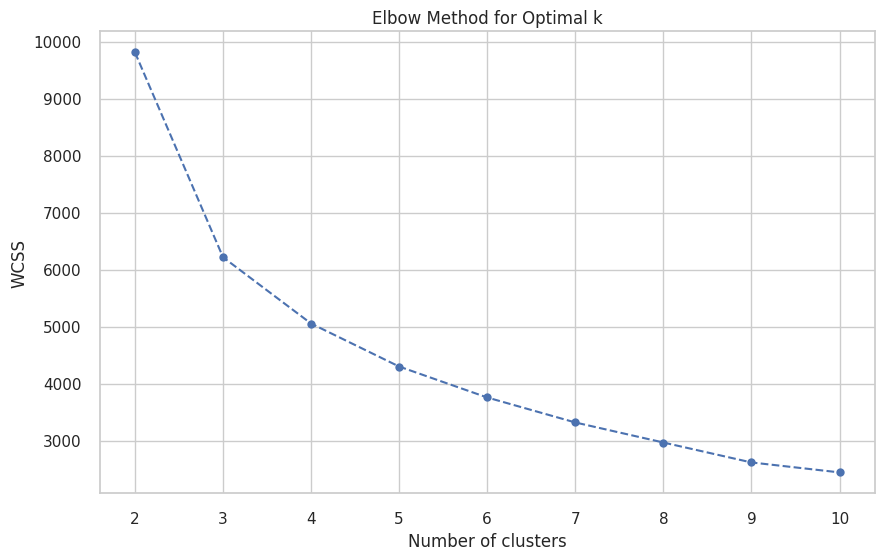

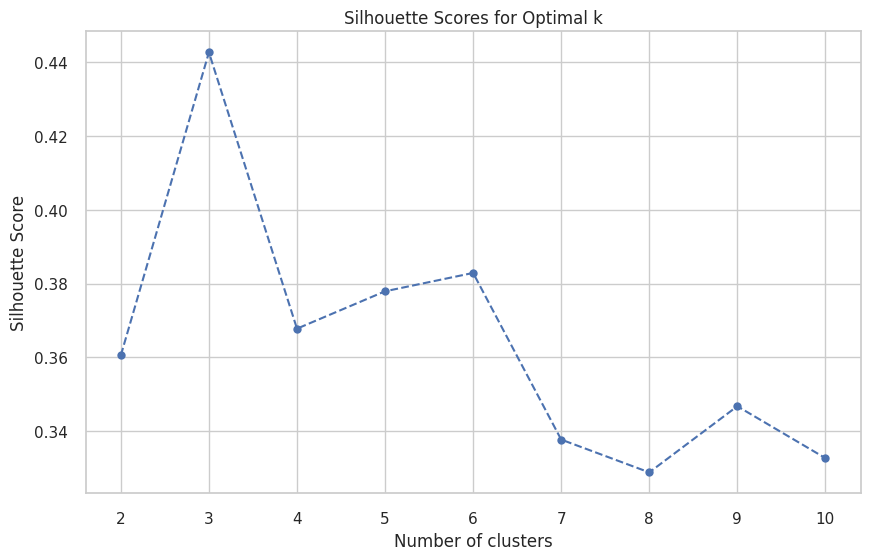

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method
wcss = []
silhouette_scores = []

for k in range(2, 11):  # Checking k from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_df)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled_df, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


#### 1.2 Model Execution

In [ ]:
# Optimal k determined from the Elbow or Silhouette method
optimal_k = 3

# Executing K-Means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_scaled_df['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled_df)

print(f"K-Means model executed with k={optimal_k}")


K-Means model executed with k=3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#### 1.3 Model Performance & Score

In [ ]:
from sklearn.metrics import adjusted_rand_score, davies_bouldin_score, silhouette_score

# Silhouette Score
kmeans_silhouette = silhouette_score(rfm_scaled_df.drop('KMeans_Cluster', axis=1), rfm_scaled_df['KMeans_Cluster'])
print(f"Silhouette Score: {kmeans_silhouette:.4f}")

# Adjusted Rand Index (ARI)
# In this context, ARI is more meaningful if you have true labels, so here it is calculated hypothetically
# true_labels = [..]  # Placeholder, you might not have this
# ari = adjusted_rand_score(true_labels, rfm_scaled_df['KMeans_Cluster'])
# print(f"Adjusted Rand Index: {ari:.4f}")

# Davies-Bouldin Index
kmeans_db_index = davies_bouldin_score(rfm_scaled_df.drop('KMeans_Cluster', axis=1), rfm_scaled_df['KMeans_Cluster'])
print(f"Davies-Bouldin Index: {kmeans_db_index:.4f}")

# Dunn's Index
def dunn_index(X, labels):
    from sklearn.metrics.pairwise import euclidean_distances
    distances = euclidean_distances(X)
    unique_labels = np.unique(labels)
    min_intercluster = np.inf
    max_intracluster = 0

    for i in unique_labels:
        intracluster_distances = distances[labels == i][:, labels == i]
        max_intracluster = max(max_intracluster, np.max(intracluster_distances))

        for j in unique_labels:
            if i != j:
                intercluster_distances = distances[labels == i][:, labels == j]
                min_intercluster = min(min_intercluster, np.min(intercluster_distances))

    return min_intercluster / max_intracluster

kmeans_dunn_index = dunn_index(rfm_scaled_df.drop('KMeans_Cluster', axis=1), rfm_scaled_df['KMeans_Cluster'])
print(f"Dunn's Index: {kmeans_dunn_index:.4f}")


Silhouette Score: 0.4426
Davies-Bouldin Index: 0.8942
Dunn's Index: 0.0385


#### 1.4 Cluster visualisation with PCA

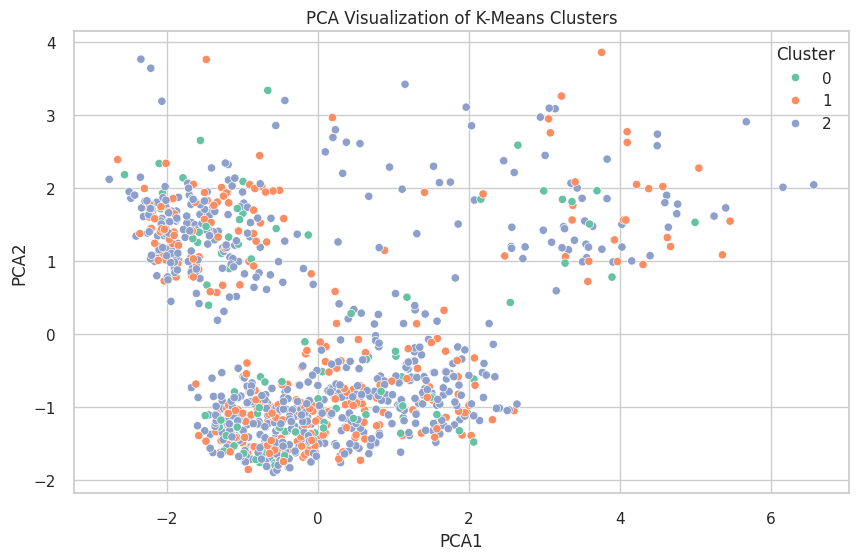

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(rfm_scaled_df.drop('KMeans_Cluster', axis=1))

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = rfm_scaled_df['KMeans_Cluster'].astype(str)

# Plot the PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set2')
plt.title('PCA Visualization of K-Means Clusters')
plt.show()


#### 1.5 t - SNE Cluster Visualisation

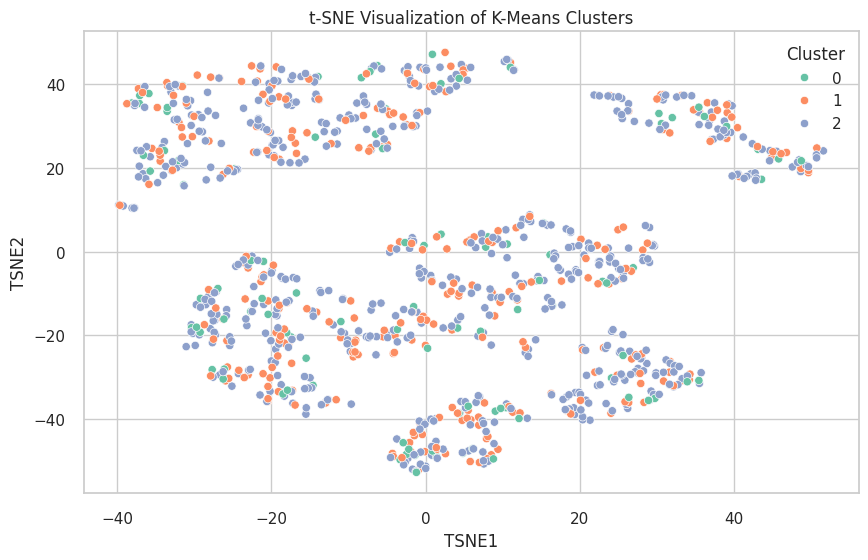

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensionality to 2 components
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(rfm_scaled_df.drop('KMeans_Cluster', axis=1))

# Create a DataFrame with t-SNE components and cluster labels
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = rfm_scaled_df['KMeans_Cluster'].astype(str)

# Plot the t-SNE components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=tsne_df, palette='Set2')
plt.title('t-SNE Visualization of K-Means Clusters')
plt.show()


### 2. DBSCAN

#### 2.1 Hyperparameter Tuning

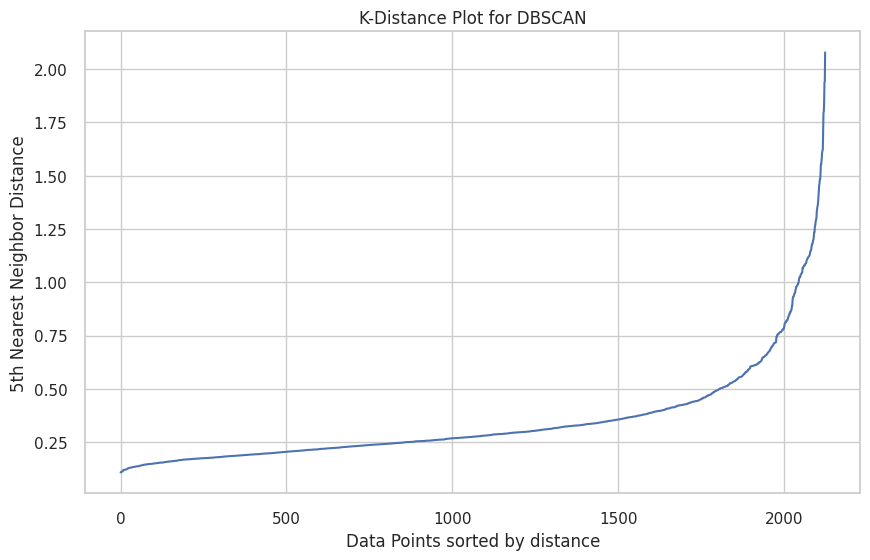

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Calculate the distance to the 5th nearest neighbor for each point
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(rfm_scaled_df)
distances, indices = neighbors_fit.kneighbors(rfm_scaled_df)

# Sort the distances and plot them
distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Plot for DBSCAN')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()

# You can choose the optimal 'eps' where the plot shows the largest slope


#### 2.2 Model Execution

In [ ]:
from sklearn.cluster import DBSCAN

# Chosen eps and min_samples from the K-distance plot
optimal_eps = 0.7
min_samples = 10

# Executing DBSCAN with chosen hyperparameters
dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
rfm_scaled_df['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled_df)

print(f"DBSCAN model executed with eps={optimal_eps} and min_samples={min_samples}")


DBSCAN model executed with eps=0.7 and min_samples=10


#### 2.3  Evaluation Metrics for DBSCAN

In [ ]:
# Silhouette Score
dbscan_silhouette = silhouette_score(rfm_scaled_df.drop('DBSCAN_Cluster', axis=1), rfm_scaled_df['DBSCAN_Cluster'])
print(f"Silhouette Score: {dbscan_silhouette:.4f}")

# Davies-Bouldin Index
dbscan_db_index = davies_bouldin_score(rfm_scaled_df.drop('DBSCAN_Cluster', axis=1), rfm_scaled_df['DBSCAN_Cluster'])
print(f"Davies-Bouldin Index: {dbscan_db_index:.4f}")

# Dunn's Index for DBSCAN
dbscan_dunn_index = dunn_index(rfm_scaled_df.drop('DBSCAN_Cluster', axis=1), rfm_scaled_df['DBSCAN_Cluster'])
print(f"Dunn's Index: {dbscan_dunn_index:.4f}")


Silhouette Score: 0.4006
Davies-Bouldin Index: 1.8148
Dunn's Index: 0.0188


#### 2.4 Cluster Visualization with PCA

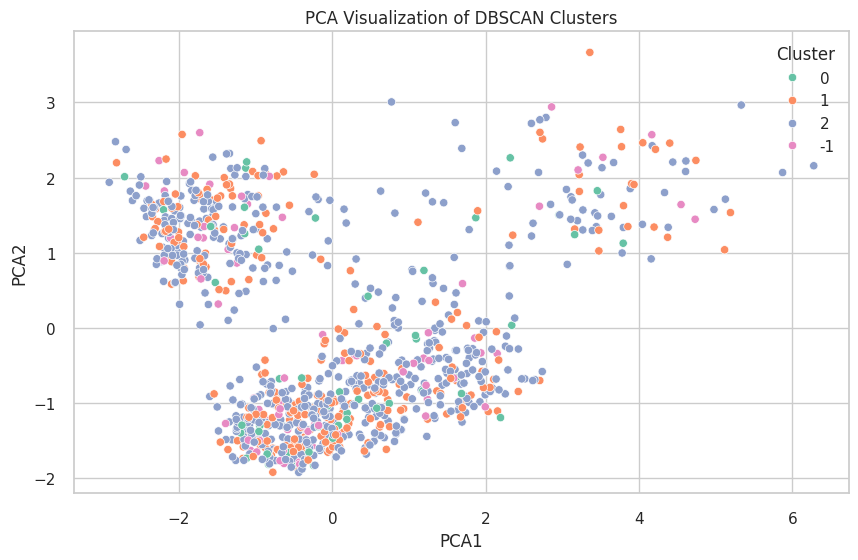

In [ ]:
# Apply PCA to DBSCAN clusters
pca_components = pca.fit_transform(rfm_scaled_df.drop('DBSCAN_Cluster', axis=1))

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = rfm_scaled_df['DBSCAN_Cluster'].astype(str)

# Plot the PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set2')
plt.title('PCA Visualization of DBSCAN Clusters')
plt.show()


#### 2.5 Cluster Visualization with t-SNE

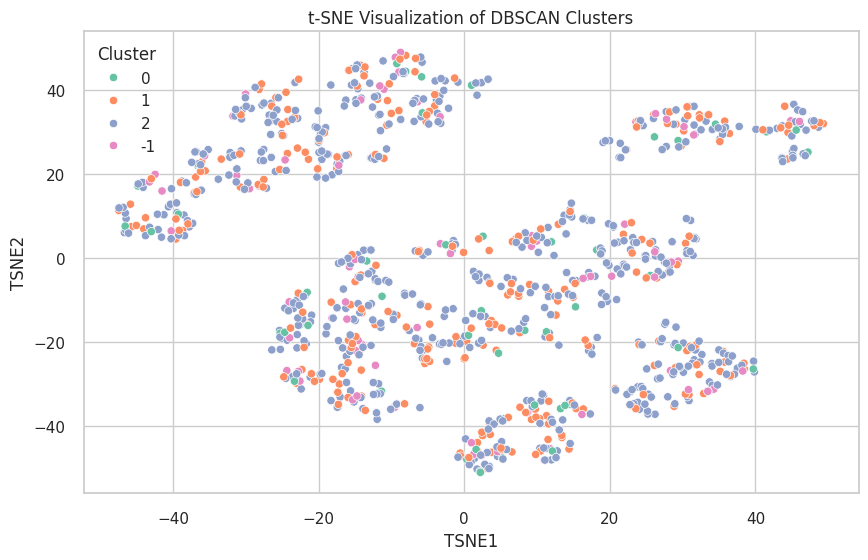

In [ ]:
# Apply t-SNE to DBSCAN clusters
tsne_components = tsne.fit_transform(rfm_scaled_df.drop('DBSCAN_Cluster', axis=1))

# Create a DataFrame with t-SNE components and cluster labels
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = rfm_scaled_df['DBSCAN_Cluster'].astype(str)

# Plot the t-SNE components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=tsne_df, palette='Set2')
plt.title('t-SNE Visualization of DBSCAN Clusters')
plt.show()


### 3. Hierarchial Clustering

#### 3.1 Hyperparameter Tuning for Hierarchical Clustering

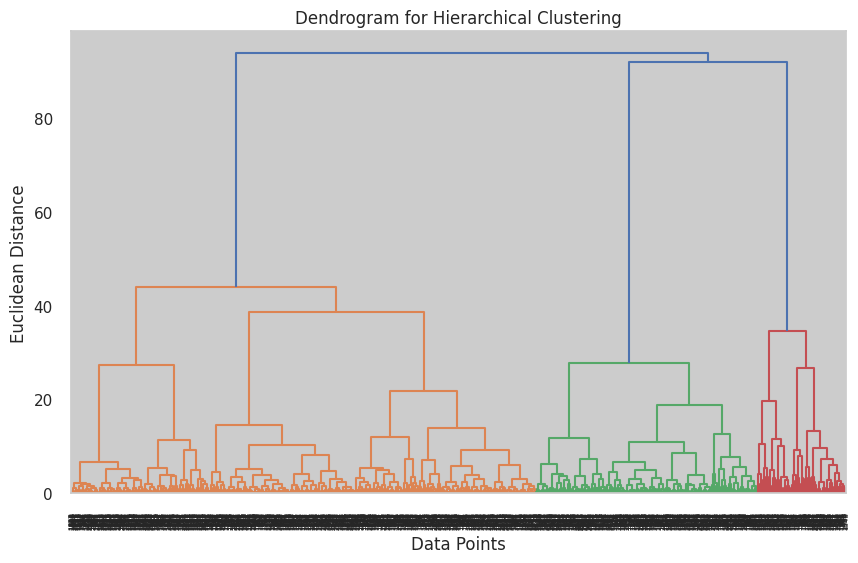

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
Z = linkage(rfm_scaled_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

# Number of clusters can be chosen by looking at the longest vertical line that does not intersect any horizontal line


There is a large vertical gap between the merge at a height of around 70 (where three clusters are combined into two) and the next significant merge at around 10–20.

This large gap suggests that the optimal number of clusters would be 2 or 3

#### 3.2 Model Execution using Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Execute Agglomerative Clustering with the chosen number of clusters
optimal_clusters = 4
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters)
rfm_scaled_df['Hierarchical_Cluster'] = hierarchical.fit_predict(rfm_scaled_df)

print(f"Hierarchical Clustering model executed with n_clusters={optimal_clusters}")


Hierarchical Clustering model executed with n_clusters=4


#### 3.3 Evaluation Metrics for Hierarchical Clustering

In [ ]:
# Silhouette Score
hierarchical_silhouette = silhouette_score(rfm_scaled_df.drop('Hierarchical_Cluster', axis=1), rfm_scaled_df['Hierarchical_Cluster'])
print(f"Silhouette Score: {hierarchical_silhouette:.4f}")

# Davies-Bouldin Index
hierarchical_db_index = davies_bouldin_score(rfm_scaled_df.drop('Hierarchical_Cluster', axis=1), rfm_scaled_df['Hierarchical_Cluster'])
print(f"Davies-Bouldin Index: {hierarchical_db_index:.4f}")

# Dunn's Index for Hierarchical Clustering
hierarchical_dunn_index = dunn_index(rfm_scaled_df.drop('Hierarchical_Cluster', axis=1), rfm_scaled_df['Hierarchical_Cluster'])
print(f"Dunn's Index: {hierarchical_dunn_index:.4f}")



Silhouette Score: 0.2621
Davies-Bouldin Index: 1.1081
Dunn's Index: 0.0131


#### 3.4 Cluster Visualization with PCA

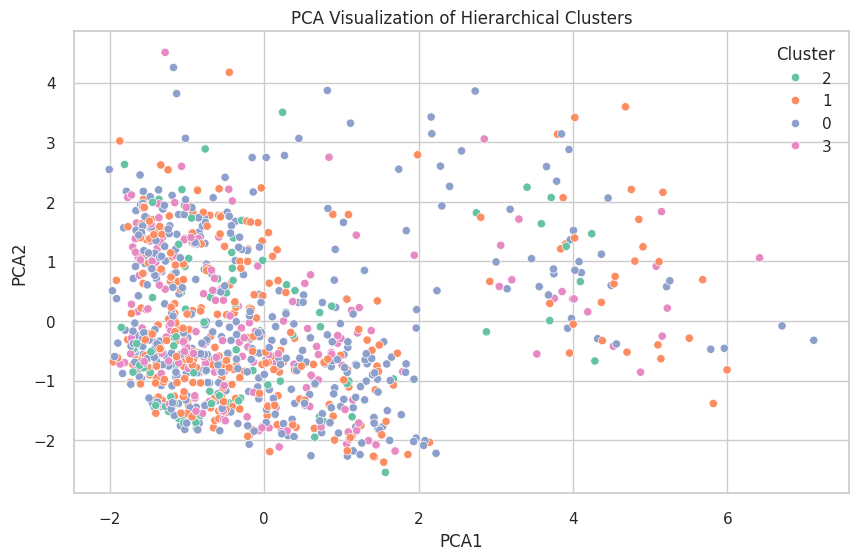

In [ ]:
# Apply PCA to Hierarchical Clustering clusters
pca_components = pca.fit_transform(rfm_scaled_df.drop('Hierarchical_Cluster', axis=1))

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = rfm_scaled_df['Hierarchical_Cluster'].astype(str)

# Plot the PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set2')
plt.title('PCA Visualization of Hierarchical Clusters')
plt.show()


#### 3.5 Cluster Visualization with t-SNE

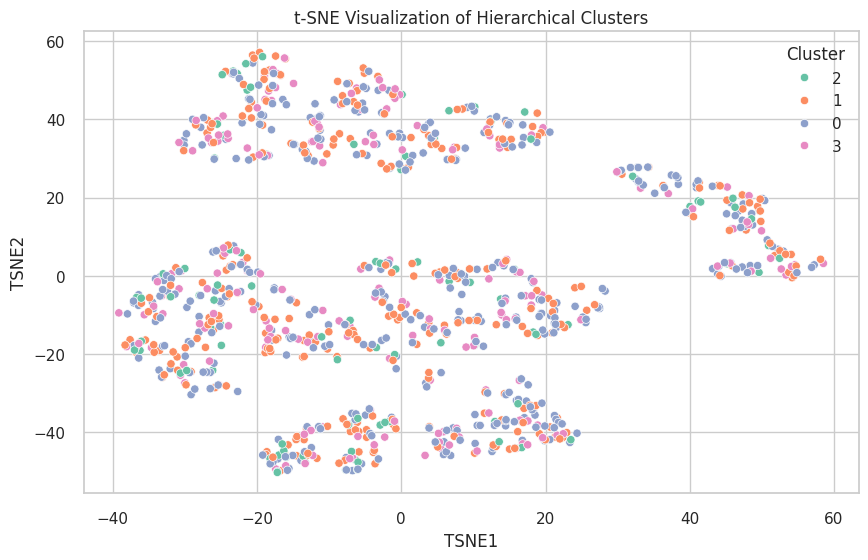

In [ ]:
# Apply t-SNE to Hierarchical Clustering clusters
tsne_components = tsne.fit_transform(rfm_scaled_df.drop('Hierarchical_Cluster', axis=1))

# Create a DataFrame with t-SNE components and cluster labels
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = rfm_scaled_df['Hierarchical_Cluster'].astype(str)

# Plot the t-SNE components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=tsne_df, palette='Set2')
plt.title('t-SNE Visualization of Hierarchical Clusters')
plt.show()


### 4. Comparing & Choosing Model

#### 4.1 Comparing Evaluation metrics

In [ ]:
# Compiling the evaluation metrics
comparison_df = pd.DataFrame({
    'Model': ['K-Means', 'DBSCAN', 'Hierarchical Clustering'],
    'Silhouette Score': [kmeans_silhouette, dbscan_silhouette, hierarchical_silhouette],
    'Davies-Bouldin Index': [kmeans_db_index, dbscan_db_index, hierarchical_db_index],
    'Dunn\'s Index': [kmeans_dunn_index, dbscan_dunn_index, hierarchical_dunn_index],
})

print("Comparison of Clustering Models:")
display(comparison_df)


Comparison of Clustering Models:


Model  Silhouette Score  Davies-Bouldin Index  \
0                  K-Means          0.442551              0.894164   
1                   DBSCAN          0.400563              1.814769   
2  Hierarchical Clustering          0.262086              1.108119   

   Dunn's Index  
0      0.038498  
1      0.018778  
2      0.013076

#### 4.2 Choosing Model & Adding clusters

In [ ]:
rfm_scaled_df

AvgOrderValue   Recency  TotalPurchaseValue  Monetary  ProductPurchased  \
3          1.011048 -0.887859            2.714656  2.714656          0.828194   
4          0.489322  1.939293           -0.482075 -0.482075         -0.620485   
6          0.794796  0.909471           -1.033301 -1.033301         -0.956785   
7          0.363759  1.181499            1.191371  1.191371          0.440155   
8          2.344833  1.006624           -0.201295 -0.201295         -0.723962   
...             ...       ...                 ...       ...               ...   
4357       0.223279 -0.372949            0.567164  0.567164          0.077985   
4366       0.448065 -0.353518           -0.842596 -0.842596         -0.827439   
4367       0.298583  1.628403           -0.827546 -0.827546         -0.801569   
4368      -0.472889  0.686019           -1.051675 -1.051675         -0.879177   
4371       1.268135 -0.654692            2.893748  2.893748          0.466024   

      DBSCAN_Cluster  Hierarchical_Cluster  KMeans_Cluster  
3                  0                     2               0  
4                  1                     1               1  
6                  1                     1               1  
7                  2                     0               2  
8                  1                     1               1  
...              ...                   ...             ...  
4357               2                     0               2  
4366               2                     3               2  
4367               1                     1               1  
4368               1                     1               1  
4371               0                     2               0  

[2125 rows x 8 columns]

In [ ]:
rfm_no_outliers

CustomerID  Recency  Frequency  Monetary  AvgOrderValue  \
3        12349.0       19          1   1757.55      24.076027   
4        12350.0      310          1    334.40      19.670588   
6        12353.0      204          1     89.00      22.250000   
7        12354.0      232          1   1079.40      18.610345   
8        12355.0      214          1    459.40      35.338462   
...          ...      ...        ...       ...            ...   
4357     18265.0       72          2    801.51      17.424130   
4366     18278.0       74          1    173.90      19.322222   
4367     18280.0      278          1    180.60      18.060000   
4368     18281.0      181          1     80.82      11.545714   
4371     18287.0       43          3   1837.28      26.246857   

      AvgPurchaseInterval  ReturnsRatio  TotalReturnValue  TotalPurchaseValue  \
3                0.000000           0.0               0.0             1757.55   
4                0.000000           0.0               0.0              334.40   
6                0.000000           0.0               0.0               89.00   
7                0.000000           0.0               0.0             1079.40   
8                0.000000           0.0               0.0              459.40   
...                   ...           ...               ...                 ...   
4357             1.888889           0.0               0.0              801.51   
4366             0.000000           0.0               0.0              173.90   
4367             0.000000           0.0               0.0              180.60   
4368             0.000000           0.0               0.0               80.82   
4371             2.275362           0.0               0.0             1837.28   

      MonetaryReturnsRatio  ProductPurchased  CustomerLoyaltyDuration  \
3                      0.0                73                        0   
4                      0.0                17                        0   
6                      0.0                 4                        0   
7                      0.0                58                        0   
8                      0.0                13                        0   
...                    ...               ...                      ...   
4357                   0.0                44                       85   
4366                   0.0                 9                        0   
4367                   0.0                10                        0   
4368                   0.0                 7                        0   
4371                   0.0                59                      158   

      OrderCount  NumProductCategories MostCommonCategory  \
3              1                     7      Miscellaneous   
4              1                     2      Miscellaneous   
6              1                     1      Miscellaneous   
7              1                     6      Miscellaneous   
8              1                     2      Miscellaneous   
...          ...                   ...                ...   
4357           2                     5      Miscellaneous   
4366           1                     3      Miscellaneous   
4367           1                     4      Miscellaneous   
4368           1                     3      Miscellaneous   
4371           3                     5      Miscellaneous   

      PurchasedTop10StockCodes  PurchasedTop10Descriptions  Cluster  \
3                            1                           1        2   
4                            0                           0        0   
6                            0                           0        0   
7                            1                           1        2   
8                            1                           1        2   
...                        ...                         ...      ...   
4357                         1                           1        2   
4366                         0                           0        0   
436

In [ ]:
rfm_no_outliers['KMeans_Cluster'] = rfm_scaled_df['KMeans_Cluster']

# Step 4: Display the first few rows to confirm the clusters have been added
print("RFM Table with Assigned Clusters:")
display(rfm_no_outliers.head())

RFM Table with Assigned Clusters:


CustomerID  Recency  Frequency  Monetary  AvgOrderValue  \
3     12349.0       19          1   1757.55      24.076027   
4     12350.0      310          1    334.40      19.670588   
6     12353.0      204          1     89.00      22.250000   
7     12354.0      232          1   1079.40      18.610345   
8     12355.0      214          1    459.40      35.338462   

   AvgPurchaseInterval  ReturnsRatio  TotalReturnValue  TotalPurchaseValue  \
3                  0.0           0.0               0.0             1757.55   
4                  0.0           0.0               0.0              334.40   
6                  0.0           0.0               0.0               89.00   
7                  0.0           0.0               0.0             1079.40   
8                  0.0           0.0               0.0              459.40   

   MonetaryReturnsRatio  ProductPurchased  CustomerLoyaltyDuration  \
3                   0.0                73                        0   
4                   0.0                17                        0   
6                   0.0                 4                        0   
7                   0.0                58                        0   
8                   0.0                13                        0   

   OrderCount  NumProductCategories MostCommonCategory  \
3           1                     7      Miscellaneous   
4           1                     2      Miscellaneous   
6           1                     1      Miscellaneous   
7           1                     6      Miscellaneous   
8           1                     2      Miscellaneous   

   PurchasedTop10StockCodes  PurchasedTop10Descriptions  Cluster  \
3                         1                           1        2   
4                         0                           0        0   
6                         0                           0        0   
7                         1                           1        2   
8                         1                           1        2   

   DBSCAN_Cluster  KMeans_Cluster  
3               1               0  
4               0               1  
6               0               1  
7               1               2  
8               1               1

## 9. Understanding Clusters in the Business Sense

### Scatter Plot: AvgOrderValue vs. TotalPurchaseValue by Cluster

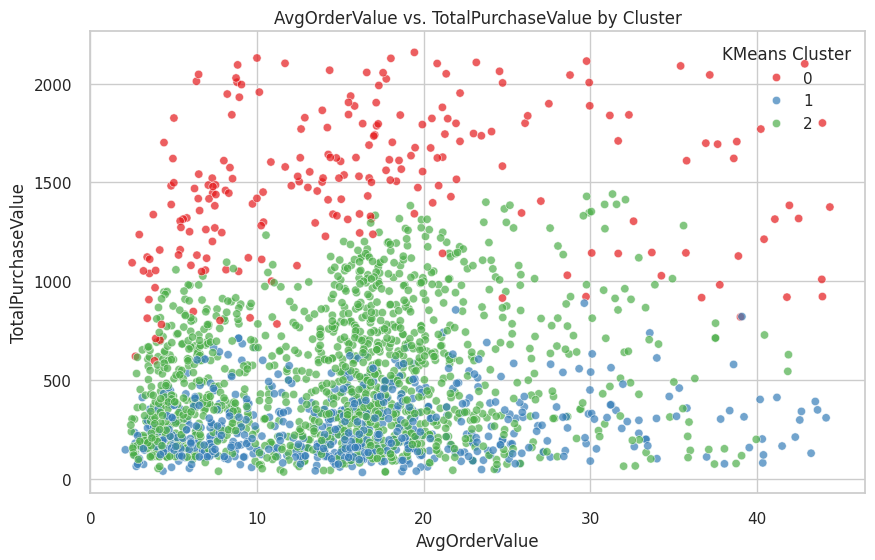

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_no_outliers, x='AvgOrderValue', y='TotalPurchaseValue', hue='KMeans_Cluster', palette='Set1', alpha=0.7)
plt.title('AvgOrderValue vs. TotalPurchaseValue by Cluster')
plt.xlabel('AvgOrderValue')
plt.ylabel('TotalPurchaseValue')
plt.legend(title='KMeans Cluster')
plt.show()


### Scatter Plot: Recency vs. Monetary by Cluster

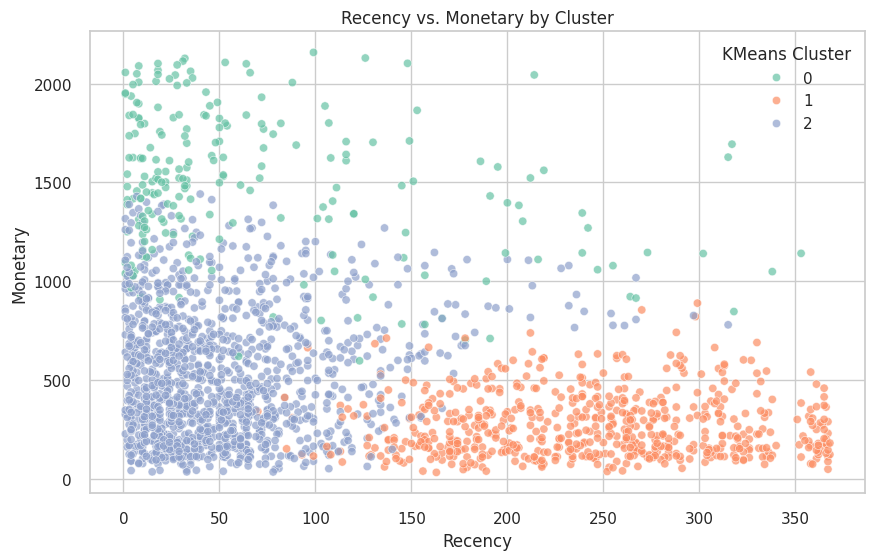

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_no_outliers, x='Recency', y='Monetary', hue='KMeans_Cluster', palette='Set2', alpha=0.7)
plt.title('Recency vs. Monetary by Cluster')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(title='KMeans Cluster')
plt.show()


### Scatter Plot: ProductPurchased vs. TotalPurchaseValue by Cluster

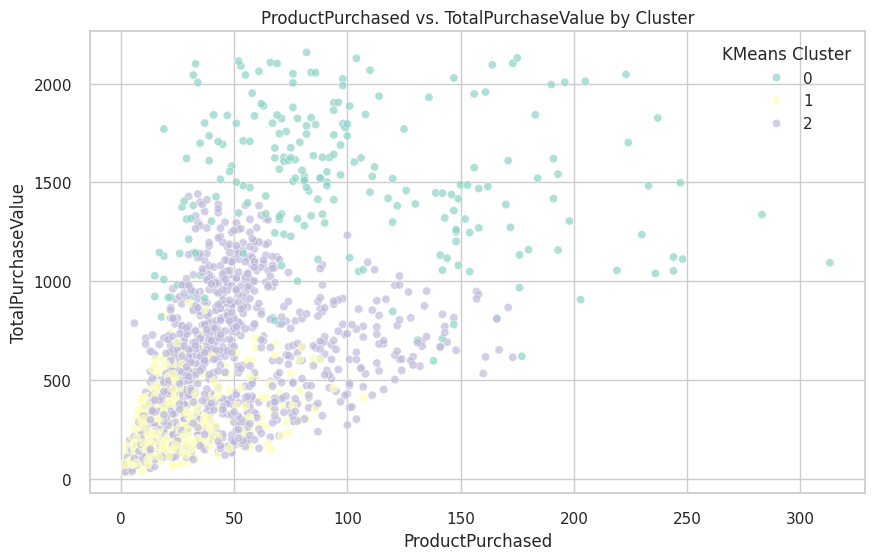

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_no_outliers, x='ProductPurchased', y='TotalPurchaseValue', hue='KMeans_Cluster', palette='Set3', alpha=0.7)
plt.title('ProductPurchased vs. TotalPurchaseValue by Cluster')
plt.xlabel('ProductPurchased')
plt.ylabel('TotalPurchaseValue')
plt.legend(title='KMeans Cluster')
plt.show()


### Pair Plot: Important Features by Cluster


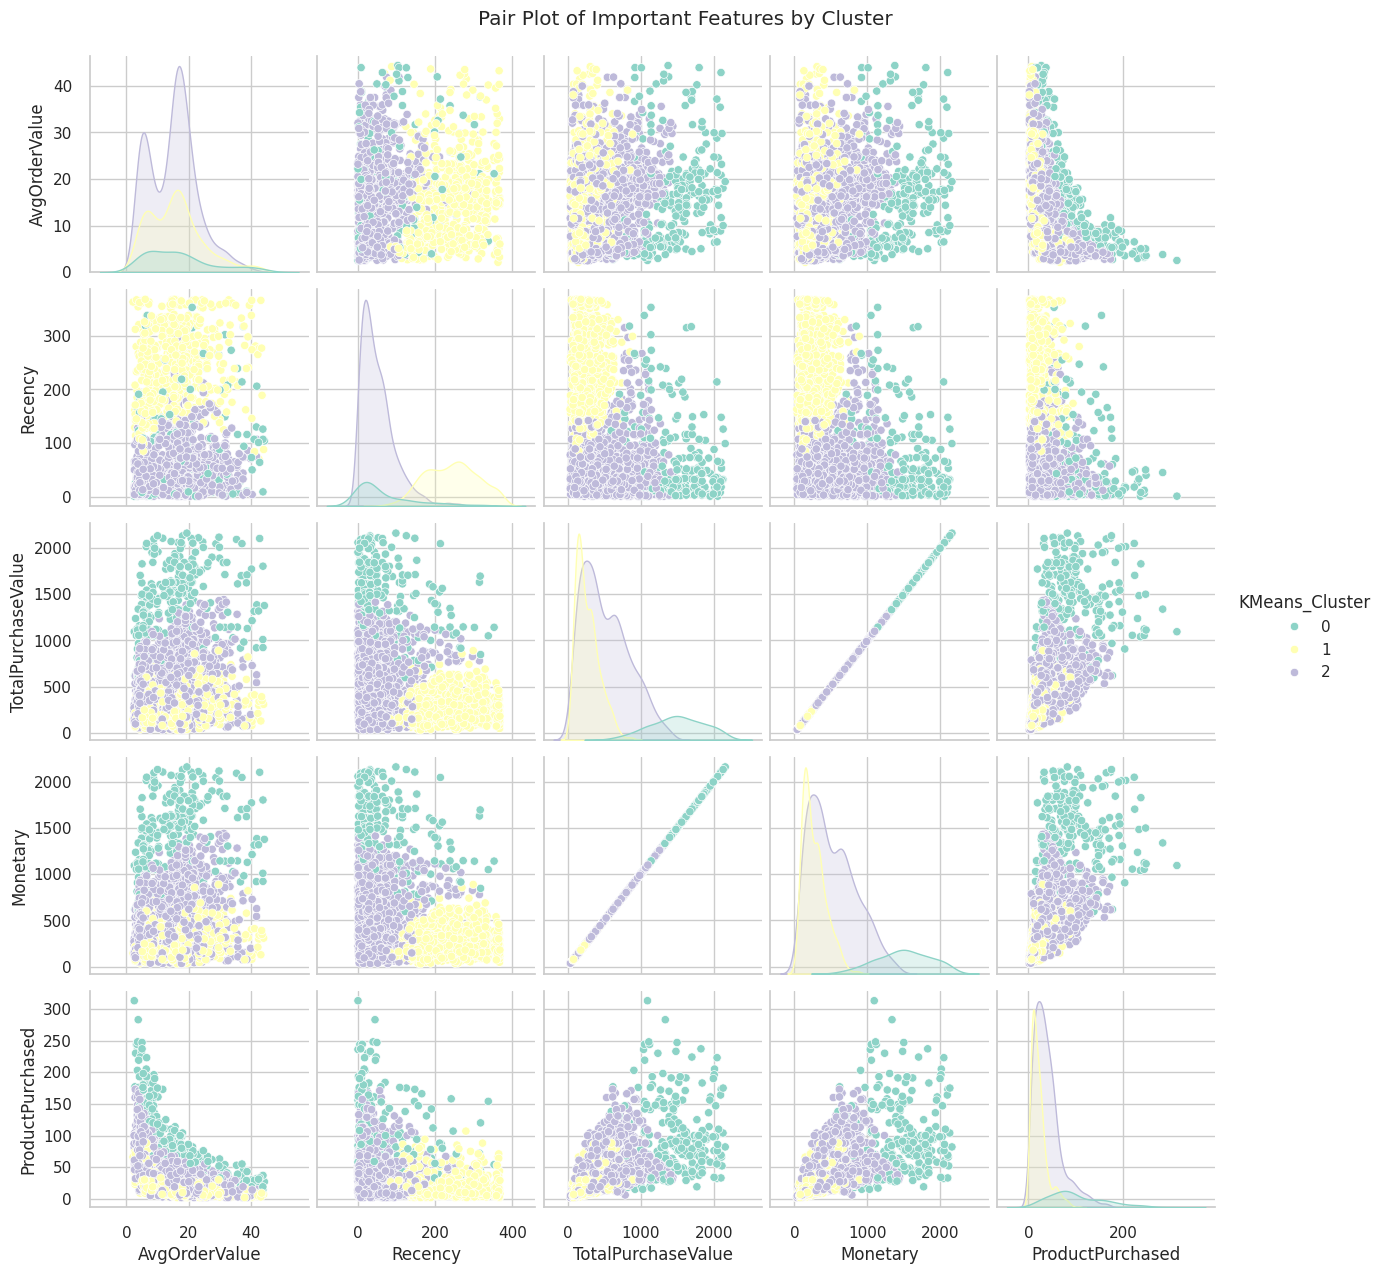

In [ ]:
sns.pairplot(rfm_no_outliers[['AvgOrderValue', 'Recency', 'TotalPurchaseValue', 'Monetary', 'ProductPurchased', 'KMeans_Cluster']], hue='KMeans_Cluster', palette='Set3')
plt.suptitle('Pair Plot of Important Features by Cluster', y=1.02)
plt.show()


### Understanding Segments of Customers

Summary of Cluster Characteristics:

Cluster 0 (Purple): Likely represents older customers who haven't purchased recently but may have made frequent small purchases in the past. They are less engaged and may require re-engagement strategies.

Cluster 1 (Yellow): Represents high-value customers who are recent and active buyers. These customers have high average order values and contribute significantly to total revenue. This segment is critical for retention and can be targeted with personalized offers.

Cluster 2 (Green): Represents moderate-value customers who have lower average order values and total spend. These customers are more recent than Cluster 0 but less engaged than Cluster 1. Strategies could focus on increasing their order frequency or value.


## 10. Cluster Tailored Business and Marketing Strategies

### Cluster 0 (Purple) : Re-engagement Strategy

#### Characteristics:

Older customers who haven't made recent purchases.

Historically made frequent but small purchases.

Low current engagement.

#### Proposed Business & Marketing Strategies:

1. Reactivation Campaigns:

Email Marketing: Send personalized re-engagement emails highlighting new products or offering exclusive discounts to entice these customers to return.

Special Offers: Provide limited-time offers or discounts to encourage them to make a purchase. Consider offering free shipping or a discount on their next purchase.


2. Loyalty Programs:

Introduce a "Comeback Bonus" where returning customers can earn additional loyalty points or rewards for making a purchase after a period of inactivity.

3. Content Marketing:

Create content that resonates with their interests or past purchasing behavior. This could include blog posts, videos, or social media content that aligns with their previous purchases or preferences.


4. Survey for Feedback:

Send out surveys to understand why they stopped purchasing. This can provide valuable insights to adjust your marketing approach or product offerings.


### Cluster 1 (Yellow): Retention and Upselling Strategy

#### Characteristics:

High-value customers who are recent and active buyers.

High average order values and significant contributors to total revenue.

#### Proposed Business & Marketing Strategies:

1. Personalized Offers and Recommendations:

Use data-driven insights to offer personalized product recommendations based on their purchasing history.

Provide exclusive access to new products, VIP sales, or special bundles that cater to their preferences.


2. Loyalty and Reward Programs:

Strengthen loyalty by offering tiered rewards or exclusive benefits like early access to sales, free gifts, or additional loyalty points for frequent purchases.

Introduce a Referral Program: Encourage these customers to refer friends and family in exchange for rewards.


3. Premium Services:

Offer premium services such as faster shipping options, dedicated customer support, or personalized shopping experiences.


4. Cross-Selling and Upselling:

Suggest complementary products during checkout or through post-purchase emails to increase average order value.

Implement a subscription model for products they purchase regularly, ensuring consistent revenue.

### Cluster 2 (Green): Growth and Engagement Strategy

#### Characteristics:

Moderate-value customers with lower average order values and total spend.

More recent than Cluster 0 but less engaged than Cluster 1.


#### Proposed Business & Marketing Strategies:

1. Incentivize Increased Spending:

Offer discounts or incentives for purchasing higher-value items or for reaching a minimum order threshold (e.g., "Spend $50, get 10% off").
Introduce bundled deals where purchasing multiple items together offers a discount.


2. Customer Education and Content:

Use content marketing to highlight the value of your products. This could involve tutorials, how-to guides, or product comparison articles to educate customers and encourage them to explore more of your offerings.


3. Increase Order Frequency:

Send personalized reminders based on past purchase intervals, encouraging them to reorder or explore similar products.

Implement limited-time offers to create urgency and prompt more frequent purchases.


4. Social Proof and Reviews:

Encourage this segment to leave reviews, and share testimonials or case studies showcasing the benefits of products they have purchased. Positive social proof can help build trust and encourage further engagement.


5. Behavioral Targeting:

Use retargeting ads to keep your brand top-of-mind, especially if they have visited your site but not made a purchase recently.

### Overall Strategy Reccomendations

1. Segmentation-Based Communication:

Develop tailored communication strategies for each cluster. Use email marketing, social media, and targeted ads to deliver messages that resonate with the unique characteristics of each segment.


2. Customer Journey Mapping:

Map out the customer journey for each segment and identify key touchpoints where you can influence their purchasing decisions. This can help in designing interventions that enhance customer experience and drive conversions.


3. Data-Driven Decision Making:

Continuously analyze the behavior of each cluster to refine your strategies. Use A/B testing to determine the most effective offers and communication methods.


4. Customer Feedback Loop:

Establish a feedback loop where customers in each segment can share their experiences. This can help you identify pain points and areas for improvement, ensuring that your strategies remain aligned with customer needs.

## 11. Building a Predictive Model

#### Preparing Data

In [ ]:
rfm_scaled_df

AvgOrderValue   Recency  TotalPurchaseValue  Monetary  ProductPurchased  \
3          1.011048 -0.887859            2.714656  2.714656          0.828194   
4          0.489322  1.939293           -0.482075 -0.482075         -0.620485   
6          0.794796  0.909471           -1.033301 -1.033301         -0.956785   
7          0.363759  1.181499            1.191371  1.191371          0.440155   
8          2.344833  1.006624           -0.201295 -0.201295         -0.723962   
...             ...       ...                 ...       ...               ...   
4357       0.223279 -0.372949            0.567164  0.567164          0.077985   
4366       0.448065 -0.353518           -0.842596 -0.842596         -0.827439   
4367       0.298583  1.628403           -0.827546 -0.827546         -0.801569   
4368      -0.472889  0.686019           -1.051675 -1.051675         -0.879177   
4371       1.268135 -0.654692            2.893748  2.893748          0.466024   

      DBSCAN_Cluster  Hierarchical_Cluster  KMeans_Cluster  
3                  0                     2               0  
4                  1                     1               1  
6                  1                     1               1  
7                  2                     0               2  
8                  1                     1               1  
...              ...                   ...             ...  
4357               2                     0               2  
4366               2                     3               2  
4367               1                     1               1  
4368               1                     1               1  
4371               0                     2               0  

[2125 rows x 8 columns]

In [ ]:
rfm_no_outliers.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'AvgOrderValue',
       'AvgPurchaseInterval', 'ReturnsRatio', 'TotalReturnValue',
       'TotalPurchaseValue', 'MonetaryReturnsRatio', 'ProductPurchased',
       'CustomerLoyaltyDuration', 'OrderCount', 'NumProductCategories',
       'MostCommonCategory', 'PurchasedTop10StockCodes',
       'PurchasedTop10Descriptions', 'Cluster', 'DBSCAN_Cluster',
       'KMeans_Cluster'],
      dtype='object')

In [ ]:
# Separate the target variable (KMeans_Cluster) before scaling
y = rfm_no_outliers['KMeans_Cluster']
X = rfm_no_outliers[['AvgOrderValue', 'Recency', 'TotalPurchaseValue', 'Monetary', 'ProductPurchased','Frequency','AvgPurchaseInterval','OrderCount' ]]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform only the features (not the target variable)
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=rfm_no_outliers.index)

# Combine the scaled features with the target variable
rfm_pred_df = pd.concat([X_scaled_df, y], axis=1)

# Preview the final DataFrame
print("Final RFM data preview with scaled features and original target:")
display(rfm_pred_df.head())


Final RFM data preview with scaled features and original target:


AvgOrderValue   Recency  TotalPurchaseValue  Monetary  ProductPurchased  \
3       1.011048 -0.887859            2.714656  2.714656          0.828194   
4       0.489322  1.939293           -0.482075 -0.482075         -0.620485   
6       0.794796  0.909471           -1.033301 -1.033301         -0.956785   
7       0.363759  1.181499            1.191371  1.191371          0.440155   
8       2.344833  1.006624           -0.201295 -0.201295         -0.723962   

   Frequency  AvgPurchaseInterval  OrderCount  KMeans_Cluster  
3  -0.738515             -0.65054   -0.738515               0  
4  -0.738515             -0.65054   -0.738515               1  
6  -0.738515             -0.65054   -0.738515               1  
7  -0.738515             -0.65054   -0.738515               2  
8  -0.738515             -0.65054   -0.738515               1

#### Train & Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = rfm_pred_df.drop('KMeans_Cluster', axis=1) # Use parentheses for calling the drop method and specify axis=1 to drop a column
y = rfm_pred_df['KMeans_Cluster']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1700, 8)
Test set shape: (425, 8)


#### Model 1: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


##### Evaluating Model on Training Set to confirm 100% training

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the training set
y_train_pred = rf_model.predict(X_train)

# Evaluate
print("Training Set Evaluation:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))


Training Set Evaluation:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       176
           1       1.00      1.00      1.00       501
           2       1.00      1.00      1.00      1023

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700


Confusion Matrix:
 [[ 176    0    0]
 [   0  501    0]
 [   0    0 1023]]


##### Evaluating Model on test Set

In [ ]:
# Predict on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluate
print("Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Test Set Evaluation:
Accuracy: 0.9788235294117648

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        44
           1       0.98      0.98      0.98       125
           2       0.98      0.99      0.98       256

    accuracy                           0.98       425
   macro avg       0.98      0.97      0.97       425
weighted avg       0.98      0.98      0.98       425


Confusion Matrix:
 [[ 41   0   3]
 [  0 122   3]
 [  1   2 253]]


####  Model 2 : Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy Score: 0.9388235294117647

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        44
           1       0.97      0.96      0.96       125
           2       0.96      0.94      0.95       256

    accuracy                           0.94       425
   macro avg       0.90      0.93      0.91       425
weighted avg       0.94      0.94      0.94       425


Confusion Matrix:
 [[ 39   0   5]
 [  0 120   5]
 [ 12   4 240]]


#### Comparing Accuracy of both models

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test))

# Create a DataFrame to compare the accuracy
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'SVM'],
    'Accuracy Score': [rf_accuracy, svm_accuracy]
})

# Display the comparison table
print("Comparison of Model Accuracy:")
print(comparison_df)


Comparison of Model Accuracy:
           Model  Accuracy Score
0  Random Forest        0.978824
1            SVM        0.938824


#### Understanding Feature Importance

In [ ]:
# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for i in range(X_train.shape[1]):
    print(f"{i + 1}. Feature {X_train.columns[indices[i]]} ({importances[indices[i]]})")


Feature ranking:
1. Feature Recency (0.5367552813908694)
2. Feature TotalPurchaseValue (0.14245698516612632)
3. Feature Monetary (0.1390047628738244)
4. Feature ProductPurchased (0.06701623835968099)
5. Feature AvgOrderValue (0.049852447291784355)
6. Feature AvgPurchaseInterval (0.03554739820506129)
7. Feature Frequency (0.015011314411825807)
8. Feature OrderCount (0.014355572300827445)
